In [1]:
import ROOT as R
import math

Welcome to JupyROOT 6.10/08


In [9]:
#f = R.TFile.Open("/Users/cerati/Notebooks/mcc9.0-files/allstudies_prodgenie_bnb_nu_only_mcc9_v12_reco2.root")
f = R.TFile.Open("/Users/cerati/Notebooks/mcc9.0-files/allstudies_prodgenie_bnb_nu_uboone_overlay_mcc9_v12.root")
#f.ls()
t = f.Get("splitvertexntuplizer/tree")
#t.GetListOfBranches().ls()
#
fd = R.TFile.Open("/Users/cerati/Notebooks/mcc9.0-files/allstudies_data_bnb_optfilter_C1_5e19_goodruns_v08_00_00_12_reco2.root")
td = fd.Get("splitvertexntuplizer/tree")
#

In [10]:
### Let's define the vertex selection cuts ###
#
# Preselection
precut1 = "v1status==2 && v1tstatus[0]==3 && v1tstatus[1]==3"# && passSelII
precut2 = "v2status==2 && v2tstatus[0]==3 && v2tstatus[1]==3"# && passSelII
#
# talk
#cut1lh0 = "&& tlength[v1tidx[0]]>2 && tnvalid[v1tidx[0]]>5 && v1tidx[0]==0"# talk
#cut1lh1 = "&& tlength[v1tidx[1]]>2 && tnvalid[v1tidx[1]]>5 && v1tidx[1]==3"# talk
#cut1spd0 = "&& v1tsip[0]<1.0 && v1tpd[0]>-5 && v1tpd[0]<2" # talk
#cut1spd1 = "&& v1tsip[1]<1.0 && v1tpd[1]>-5 && v1tpd[1]<2" # talk
#cut1dph = "&& (abs(atan2(tk_vtx_uy[v1tidx[0]],tk_vtx_ux[v1tidx[0]])-atan2(tk_vtx_uy[v1tidx[1]],tk_vtx_ux[v1tidx[1]]))<3.0 || abs(atan2(tk_vtx_uy[v1tidx[0]],tk_vtx_ux[v1tidx[0]])-atan2(tk_vtx_uy[v1tidx[1]],tk_vtx_ux[v1tidx[1]]))>3.2)"
#cut2lh0 = "&& tlength[v2tidx[0]]>2 && tnvalid[v2tidx[0]]>5 && v2tidx[0]==1"# talk
#cut2lh1 = "&& tlength[v2tidx[1]]>2 && tnvalid[v2tidx[1]]>5 && v2tidx[1]==2"# talk
#cut2spd0 = "&& v2tsip[0]<1.0 && v2tpd[0]>-5 && v2tpd[0]<2"# talk
#cut2spd1 = "&& v2tsip[1]<1.0 && v2tpd[1]>-5 && v2tpd[1]<2"# talk
#cut2dph = "&& (abs(atan2(tk_vtx_uy[v2tidx[0]],tk_vtx_ux[v2tidx[0]])-atan2(tk_vtx_uy[v2tidx[1]],tk_vtx_ux[v2tidx[1]]))<3.0 || abs(atan2(tk_vtx_uy[v2tidx[0]],tk_vtx_ux[v2tidx[0]])-atan2(tk_vtx_uy[v2tidx[1]],tk_vtx_ux[v2tidx[1]]))>3.2)"
#
# talk no vtidx
#cut1lh0 = "&& tlength[v1tidx[0]]>2 && tnvalid[v1tidx[0]]>5"
#cut1lh1 = "&& tlength[v1tidx[1]]>2 && tnvalid[v1tidx[1]]>5"
#cut1spd0 = "&& v1tsip[0]<1.0 && v1tpd[0]>-5 && v1tpd[0]<2" 
#cut1spd1 = "&& v1tsip[1]<1.0 && v1tpd[1]>-5 && v1tpd[1]<2" 
#cut1dph = "&& (abs(atan2(tk_vtx_uy[v1tidx[0]],tk_vtx_ux[v1tidx[0]])-atan2(tk_vtx_uy[v1tidx[1]],tk_vtx_ux[v1tidx[1]]))<3.0 || abs(atan2(tk_vtx_uy[v1tidx[0]],tk_vtx_ux[v1tidx[0]])-atan2(tk_vtx_uy[v1tidx[1]],tk_vtx_ux[v1tidx[1]]))>3.2)"
#cut2lh0 = "&& tlength[v2tidx[0]]>2 && tnvalid[v2tidx[0]]>5"
#cut2lh1 = "&& tlength[v2tidx[1]]>2 && tnvalid[v2tidx[1]]>5"
#cut2spd0 = "&& v2tsip[0]<1.0 && v2tpd[0]>-5 && v2tpd[0]<2"
#cut2spd1 = "&& v2tsip[1]<1.0 && v2tpd[1]>-5 && v2tpd[1]<2"
#cut2dph = "&& (abs(atan2(tk_vtx_uy[v2tidx[0]],tk_vtx_ux[v2tidx[0]])-atan2(tk_vtx_uy[v2tidx[1]],tk_vtx_ux[v2tidx[1]]))<3.0 || abs(atan2(tk_vtx_uy[v2tidx[0]],tk_vtx_ux[v2tidx[0]])-atan2(tk_vtx_uy[v2tidx[1]],tk_vtx_ux[v2tidx[1]]))>3.2)"
#
# talk no vtidx, update dphi, update nvalid
cut1lh0 = "&& tlength[v1tidx[0]]>2 && tnvalid[v1tidx[0]]>7"
cut1lh1 = "&& tlength[v1tidx[1]]>2 && tnvalid[v1tidx[1]]>7"
cut1spd0 = "&& v1tsip[0]<1.0 && v1tpd[0]>-5 && v1tpd[0]<2" 
cut1spd1 = "&& v1tsip[1]<1.0 && v1tpd[1]>-5 && v1tpd[1]<2" 
cut1dph  = "&& (abs(atan2(tk_vtx_uy[v1tidx[0]],tk_vtx_ux[v1tidx[0]])-atan2(tk_vtx_uy[v1tidx[1]],tk_vtx_ux[v1tidx[1]]))<3.1 || abs(atan2(tk_vtx_uy[v1tidx[0]],tk_vtx_ux[v1tidx[0]])-atan2(tk_vtx_uy[v1tidx[1]],tk_vtx_ux[v1tidx[1]]))>3.2)"
cut2lh0 = "&& tlength[v2tidx[0]]>2 && tnvalid[v2tidx[0]]>7"
cut2lh1 = "&& tlength[v2tidx[1]]>2 && tnvalid[v2tidx[1]]>7"
cut2spd0 = "&& v2tsip[0]<1.0 && v2tpd[0]>-5 && v2tpd[0]<2"
cut2spd1 = "&& v2tsip[1]<1.0 && v2tpd[1]>-5 && v2tpd[1]<2"
cut2dph = "&& (abs(atan2(tk_vtx_uy[v2tidx[0]],tk_vtx_ux[v2tidx[0]])-atan2(tk_vtx_uy[v2tidx[1]],tk_vtx_ux[v2tidx[1]]))<3.1 || abs(atan2(tk_vtx_uy[v2tidx[0]],tk_vtx_ux[v2tidx[0]])-atan2(tk_vtx_uy[v2tidx[1]],tk_vtx_ux[v2tidx[1]]))>3.2)"
cut2dph = cut2dph+"&& (abs(atan2(tk_vtx_uy[v2tidx[0]],tk_vtx_ux[v2tidx[0]])-atan2(tk_vtx_uy[v1tidx[0]],tk_vtx_ux[v1tidx[0]]))<3.1 || abs(atan2(tk_vtx_uy[v2tidx[0]],tk_vtx_ux[v2tidx[0]])-atan2(tk_vtx_uy[v1tidx[0]],tk_vtx_ux[v1tidx[0]]))>3.2)"
cut2dph = cut2dph+"&& (abs(atan2(tk_vtx_uy[v2tidx[0]],tk_vtx_ux[v2tidx[0]])-atan2(tk_vtx_uy[v1tidx[1]],tk_vtx_ux[v1tidx[1]]))<3.1 || abs(atan2(tk_vtx_uy[v2tidx[0]],tk_vtx_ux[v2tidx[0]])-atan2(tk_vtx_uy[v1tidx[1]],tk_vtx_ux[v1tidx[1]]))>3.2)"
#
# update, start from talk
#cut1lh0  = "&& tlength[v1tidx[0]]>2 && tnvalid[v1tidx[0]]>5"
#cut1lh1  = "&& tlength[v1tidx[1]]>2 && tnvalid[v1tidx[1]]>5"
#cut1spd0 = "&& v1tsip[0]<2.0 && v1tpd[0]>-4 && v1tpd[0]<1"
#cut1spd1 = "&& v1tsip[1]<2.0 && v1tpd[1]>-4 && v1tpd[1]<1"
#cut1dph  = "&& (abs(atan2(tk_vtx_uy[v1tidx[0]],tk_vtx_ux[v1tidx[0]])-atan2(tk_vtx_uy[v1tidx[1]],tk_vtx_ux[v1tidx[1]]))<3.12 || abs(atan2(tk_vtx_uy[v1tidx[0]],tk_vtx_ux[v1tidx[0]])-atan2(tk_vtx_uy[v1tidx[1]],tk_vtx_ux[v1tidx[1]]))>3.16)"
#cut2lh0  = "&& tlength[v2tidx[0]]>2 && tnvalid[v2tidx[0]]>5"
#cut2lh1  = "&& tlength[v2tidx[1]]>2 && tnvalid[v2tidx[1]]>5"
#cut2spd0 = "&& v2tsip[0]<2.0 && v2tpd[0]>-4 && v2tpd[0]<1"
#cut2spd1 = "&& v2tsip[1]<2.0 && v2tpd[1]>-4 && v2tpd[1]<1"
#cut2dph = "&& (abs(atan2(tk_vtx_uy[v2tidx[0]],tk_vtx_ux[v2tidx[0]])-atan2(tk_vtx_uy[v2tidx[1]],tk_vtx_ux[v2tidx[1]]))<3.12 || abs(atan2(tk_vtx_uy[v2tidx[0]],tk_vtx_ux[v2tidx[0]])-atan2(tk_vtx_uy[v2tidx[1]],tk_vtx_ux[v2tidx[1]]))>3.16)"
#cut2dph = cut2dph+"&& (abs(atan2(tk_vtx_uy[v2tidx[0]],tk_vtx_ux[v2tidx[0]])-atan2(tk_vtx_uy[v1tidx[0]],tk_vtx_ux[v1tidx[0]]))<3.12 || abs(atan2(tk_vtx_uy[v2tidx[0]],tk_vtx_ux[v2tidx[0]])-atan2(tk_vtx_uy[v1tidx[0]],tk_vtx_ux[v1tidx[0]]))>3.16)"
#cut2dph = cut2dph+"&& (abs(atan2(tk_vtx_uy[v2tidx[0]],tk_vtx_ux[v2tidx[0]])-atan2(tk_vtx_uy[v1tidx[1]],tk_vtx_ux[v1tidx[1]]))<3.12 || abs(atan2(tk_vtx_uy[v2tidx[0]],tk_vtx_ux[v2tidx[0]])-atan2(tk_vtx_uy[v1tidx[1]],tk_vtx_ux[v1tidx[1]]))>3.16)"
#
#cut1 = cut1+"&& min(tk_vtx_uz[v1tidx[0]],tk_vtx_uz[v1tidx[1]])>0.2"
#cut2 = cut2+"&& min(tk_vtx_uz[v2tidx[0]],tk_vtx_uz[v2tidx[1]])>0.2"
#cut2 = cut2+"&& (min(tk_vtx_uz[v2tidx[0]],tk_vtx_uz[v2tidx[1]])>0.2 || min(tk_vtx_uz[v1tidx[0]],tk_vtx_uz[v1tidx[1]]))"
#
#cut1 = cut1+"&& tlength[v1tidx[0]]>1 && tnvalid[v1tidx[0]]>3"# && v1tidx[0]==2" 
#cut1 = cut1+"&& tlength[v1tidx[1]]>1 && tnvalid[v1tidx[1]]>3"# && v1tidx[1]==0"
#cut1 = cut1+"&& v1tsip[0]<10.0 && v1tpd[0]>-50 && v1tpd[0]<20"
#cut1 = cut1+"&& v1tsip[1]<10.0 && v1tpd[1]>-50 && v1tpd[1]<20"
##cut1 = cut1+"&& v1tsip[0]<0.5 && v1tpd[0]>-3 && v1tpd[0]<1"
##cut1 = cut1+"&& v1tsip[1]<0.5 && v1tpd[1]>-3 && v1tpd[1]<1"
#
# update
#cut1 = cut1+"&& tlength[v1tidx[0]]>2.0 && tnvalid[v1tidx[0]]>=9"# && v1tidx[0]==2" #for bnb+numi
#cut1 = cut1+"&& tlength[v1tidx[1]]>2.0 && tnvalid[v1tidx[1]]>=9"# && v1tidx[1]==0" #for bnb+numi
#cut1 = cut1+"&& v1tsip[0]<3.0 && v1tpd[0]>-8 && v1tpd[0]<3" #for bnb+numi
#cut1 = cut1+"&& v1tsip[1]<3.0 && v1tpd[1]>-8 && v1tpd[1]<3" #for bnb+numi
#cut1 = cut1+"&& (abs(atan2(tk_vtx_uy[v1tidx[0]],tk_vtx_ux[v1tidx[0]])-atan2(tk_vtx_uy[v1tidx[1]],tk_vtx_ux[v1tidx[1]]))<3.12 || abs(atan2(tk_vtx_uy[v1tidx[0]],tk_vtx_ux[v1tidx[0]])-atan2(tk_vtx_uy[v1tidx[1]],tk_vtx_ux[v1tidx[1]]))>3.16)"
#
#cut1 = cut1+"&& tlength[v1tidx[0]]>2.0 && tnvalid[v1tidx[0]]>=7"# && v1tidx[0]==2" 
#cut1 = cut1+"&& tlength[v1tidx[1]]>2.0 && tnvalid[v1tidx[1]]>=7"# && v1tidx[1]==0"
#cut1 = cut1+"&& v1tsip[0]<2.0 && v1tpd[0]>-6 && v1tpd[0]<2"
#cut1 = cut1+"&& v1tsip[1]<2.0 && v1tpd[1]>-6 && v1tpd[1]<2"
#cut1 = cut1+"&& (abs(atan2(tk_vtx_uy[v1tidx[0]],tk_vtx_ux[v1tidx[0]])-atan2(tk_vtx_uy[v1tidx[1]],tk_vtx_ux[v1tidx[1]]))<3.12 || abs(atan2(tk_vtx_uy[v1tidx[0]],tk_vtx_ux[v1tidx[0]])-atan2(tk_vtx_uy[v1tidx[1]],tk_vtx_ux[v1tidx[1]]))>3.16)"
#cut1 = cut1+"&& (abs(atan2(tk_vtx_uy[v1tidx[0]],tk_vtx_ux[v1tidx[0]])-atan2(tk_vtx_uy[v2tidx[0]],tk_vtx_ux[v2tidx[0]]))<3.12 || abs(atan2(tk_vtx_uy[v1tidx[0]],tk_vtx_ux[v1tidx[0]])-atan2(tk_vtx_uy[v2tidx[0]],tk_vtx_ux[v2tidx[0]]))>3.16)"
#cut1 = cut1+"&& (abs(atan2(tk_vtx_uy[v1tidx[0]],tk_vtx_ux[v1tidx[0]])-atan2(tk_vtx_uy[v2tidx[1]],tk_vtx_ux[v2tidx[1]]))<3.12 || abs(atan2(tk_vtx_uy[v1tidx[0]],tk_vtx_ux[v1tidx[0]])-atan2(tk_vtx_uy[v2tidx[1]],tk_vtx_ux[v2tidx[1]]))>3.16)"
#
#cut2 = cut2+"&& tlength[v2tidx[0]]>1 && tnvalid[v2tidx[0]]>2"# && v2tidx[0]==3"
#cut2 = cut2+"&& tlength[v2tidx[1]]>1 && tnvalid[v2tidx[1]]>2"# && v2tidx[1]==1" 
#cut2 = cut2+"&& v2tsip[0]<10.0 && v2tpd[0]>-50 && v2tpd[0]<20"
#cut2 = cut2+"&& v2tsip[1]<10.0 && v2tpd[1]>-50 && v2tpd[1]<20"
##cut2 = cut2+"&& v2tsip[0]<0.5 && v2tpd[0]>-3 && v2tpd[0]<1"
##cut2 = cut2+"&& v2tsip[1]<0.5 && v2tpd[1]>-3 && v2tpd[1]<1"
#cut2 = cut2+"&& tlength[v2tidx[0]]>2.0 && tnvalid[v2tidx[0]]>=9"# && v2tidx[0]==3" #for bnb+numi
#cut2 = cut2+"&& tlength[v2tidx[1]]>2.0 && tnvalid[v2tidx[1]]>=9"# && v2tidx[1]==1"  #for bnb+numi
#cut2 = cut2+"&& v2tsip[0]<3.0 && v2tpd[0]>-8 && v2tpd[0]<3" #for bnb+numi
#cut2 = cut2+"&& v2tsip[1]<3.0 && v2tpd[1]>-8 && v2tpd[1]<3" #for bnb+numi
#cut2 = cut2+"&& (abs(atan2(tk_vtx_uy[v2tidx[0]],tk_vtx_ux[v2tidx[0]])-atan2(tk_vtx_uy[v2tidx[1]],tk_vtx_ux[v2tidx[1]]))<3.12 || abs(atan2(tk_vtx_uy[v2tidx[0]],tk_vtx_ux[v2tidx[0]])-atan2(tk_vtx_uy[v2tidx[1]],tk_vtx_ux[v2tidx[1]]))>3.16)"
#cut2 = cut2+"&& (abs(atan2(tk_vtx_uy[v2tidx[0]],tk_vtx_ux[v2tidx[0]])-atan2(tk_vtx_uy[v1tidx[0]],tk_vtx_ux[v1tidx[0]]))<3.12 || abs(atan2(tk_vtx_uy[v2tidx[0]],tk_vtx_ux[v2tidx[0]])-atan2(tk_vtx_uy[v1tidx[0]],tk_vtx_ux[v1tidx[0]]))>3.16)"
#cut2 = cut2+"&& (abs(atan2(tk_vtx_uy[v2tidx[0]],tk_vtx_ux[v2tidx[0]])-atan2(tk_vtx_uy[v1tidx[1]],tk_vtx_ux[v1tidx[1]]))<3.12 || abs(atan2(tk_vtx_uy[v2tidx[0]],tk_vtx_ux[v2tidx[0]])-atan2(tk_vtx_uy[v1tidx[1]],tk_vtx_ux[v1tidx[1]]))>3.16)"
#
#cut2 = cut2+"&& tlength[v2tidx[0]]>2.0 && tnvalid[v2tidx[0]]>=7"# && v2tidx[0]==3"
#cut2 = cut2+"&& tlength[v2tidx[1]]>2.0 && tnvalid[v2tidx[1]]>=7"# && v2tidx[1]==1" 
#cut2 = cut2+"&& v2tsip[0]<2.0 && v2tpd[0]>-6 && v2tpd[0]<2"
#cut2 = cut2+"&& v2tsip[1]<2.0 && v2tpd[1]>-6 && v2tpd[1]<2"
#cut2 = cut2+"&& (abs(atan2(tk_vtx_uy[v2tidx[0]],tk_vtx_ux[v2tidx[0]])-atan2(tk_vtx_uy[v2tidx[1]],tk_vtx_ux[v2tidx[1]]))<3.12 || abs(atan2(tk_vtx_uy[v2tidx[0]],tk_vtx_ux[v2tidx[0]])-atan2(tk_vtx_uy[v2tidx[1]],tk_vtx_ux[v2tidx[1]]))>3.16)"
#cut2 = cut2+"&& (abs(atan2(tk_vtx_uy[v2tidx[0]],tk_vtx_ux[v2tidx[0]])-atan2(tk_vtx_uy[v1tidx[0]],tk_vtx_ux[v1tidx[0]]))<3.12 || abs(atan2(tk_vtx_uy[v2tidx[0]],tk_vtx_ux[v2tidx[0]])-atan2(tk_vtx_uy[v1tidx[0]],tk_vtx_ux[v1tidx[0]]))>3.16)"
#cut2 = cut2+"&& (abs(atan2(tk_vtx_uy[v2tidx[0]],tk_vtx_ux[v2tidx[0]])-atan2(tk_vtx_uy[v1tidx[1]],tk_vtx_ux[v1tidx[1]]))<3.12 || abs(atan2(tk_vtx_uy[v2tidx[0]],tk_vtx_ux[v2tidx[0]])-atan2(tk_vtx_uy[v1tidx[1]],tk_vtx_ux[v1tidx[1]]))>3.16)"
cut1 = precut1
cut2 = precut2
cut1 = cut1+cut1lh0+cut1lh1+cut1spd0+cut1spd1+cut1dph
cut2 = cut2+cut2lh0+cut2lh1+cut2spd0+cut2spd1+cut2dph
cut12 = cut1+"&&"+cut2
#
nucut = "&& sqrt((vpos[0]-mc_vtx_x)*(vpos[0]-mc_vtx_x) + (vpos[1]-mc_vtx_y)*(vpos[1]-mc_vtx_y) + (vpos[2]-mc_vtx_z)*(vpos[2]-mc_vtx_z))<10"
crcut = "&& sqrt((vpos[0]-mc_vtx_x)*(vpos[0]-mc_vtx_x) + (vpos[1]-mc_vtx_y)*(vpos[1]-mc_vtx_y) + (vpos[2]-mc_vtx_z)*(vpos[2]-mc_vtx_z))>10"
#
#cut1 = ""
#cut2 = ""
#cut12 = ""

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cl
Warning in <TCanvas::Constructor>: Deleting canvas with same name: cv
Warning in <TCanvas::Constructor>: Deleting canvas with same name: cdsippdv1m
Warning in <TCanvas::Constructor>: Deleting canvas with same name: cdsippdv2m
Warning in <TCanvas::Constructor>: Deleting canvas with same name: cdp
Warning in <TCanvas::Constructor>: Deleting canvas with same name: ctdmc
Warning in <TCanvas::Constructor>: Deleting canvas with same name: ctdm


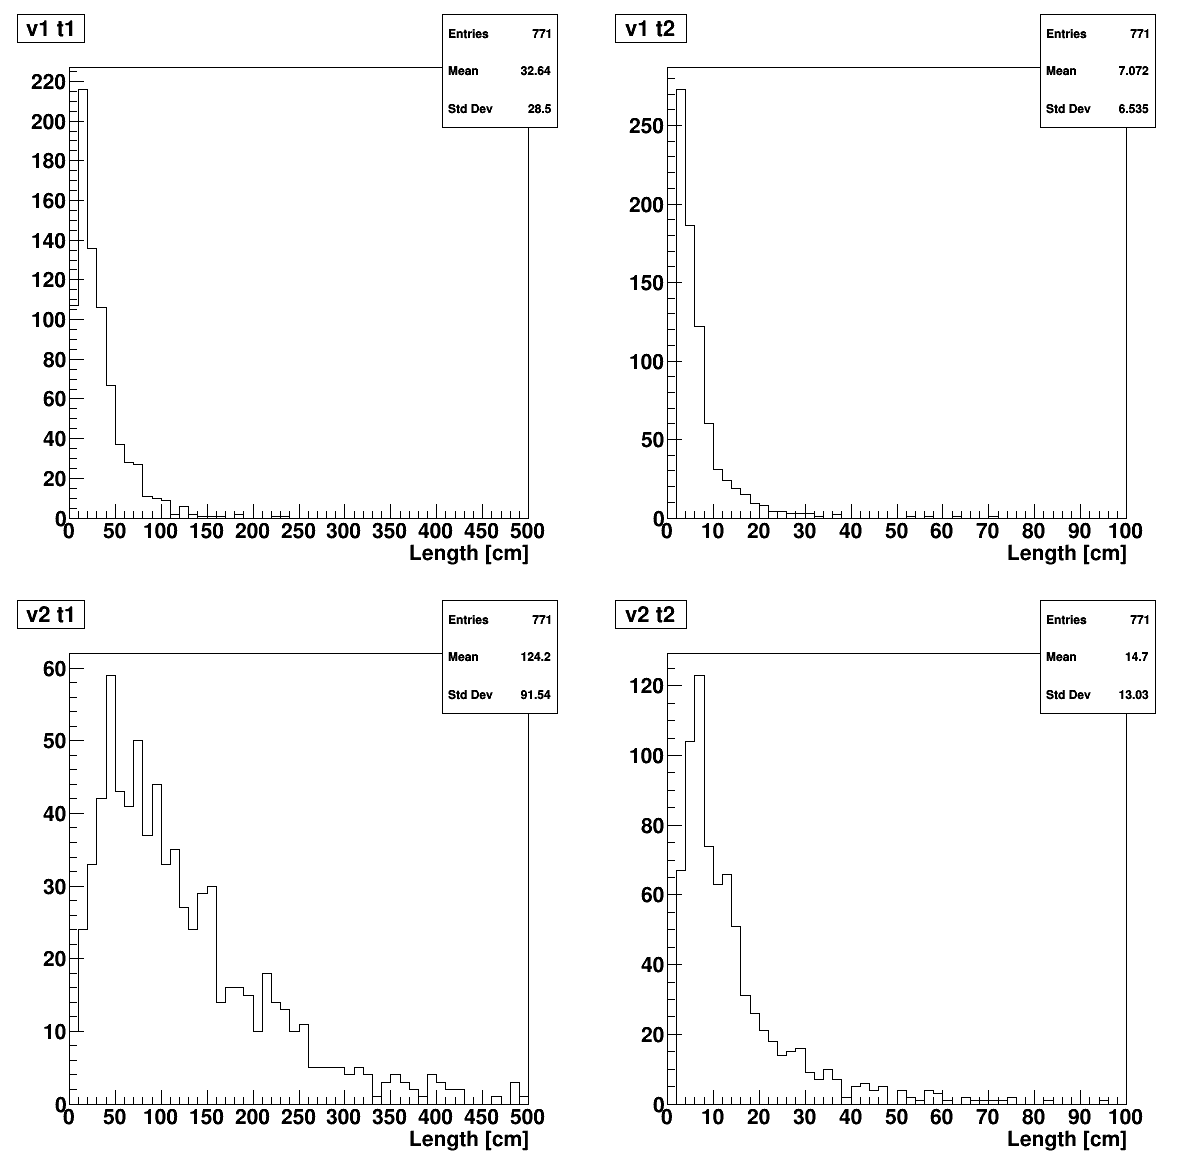

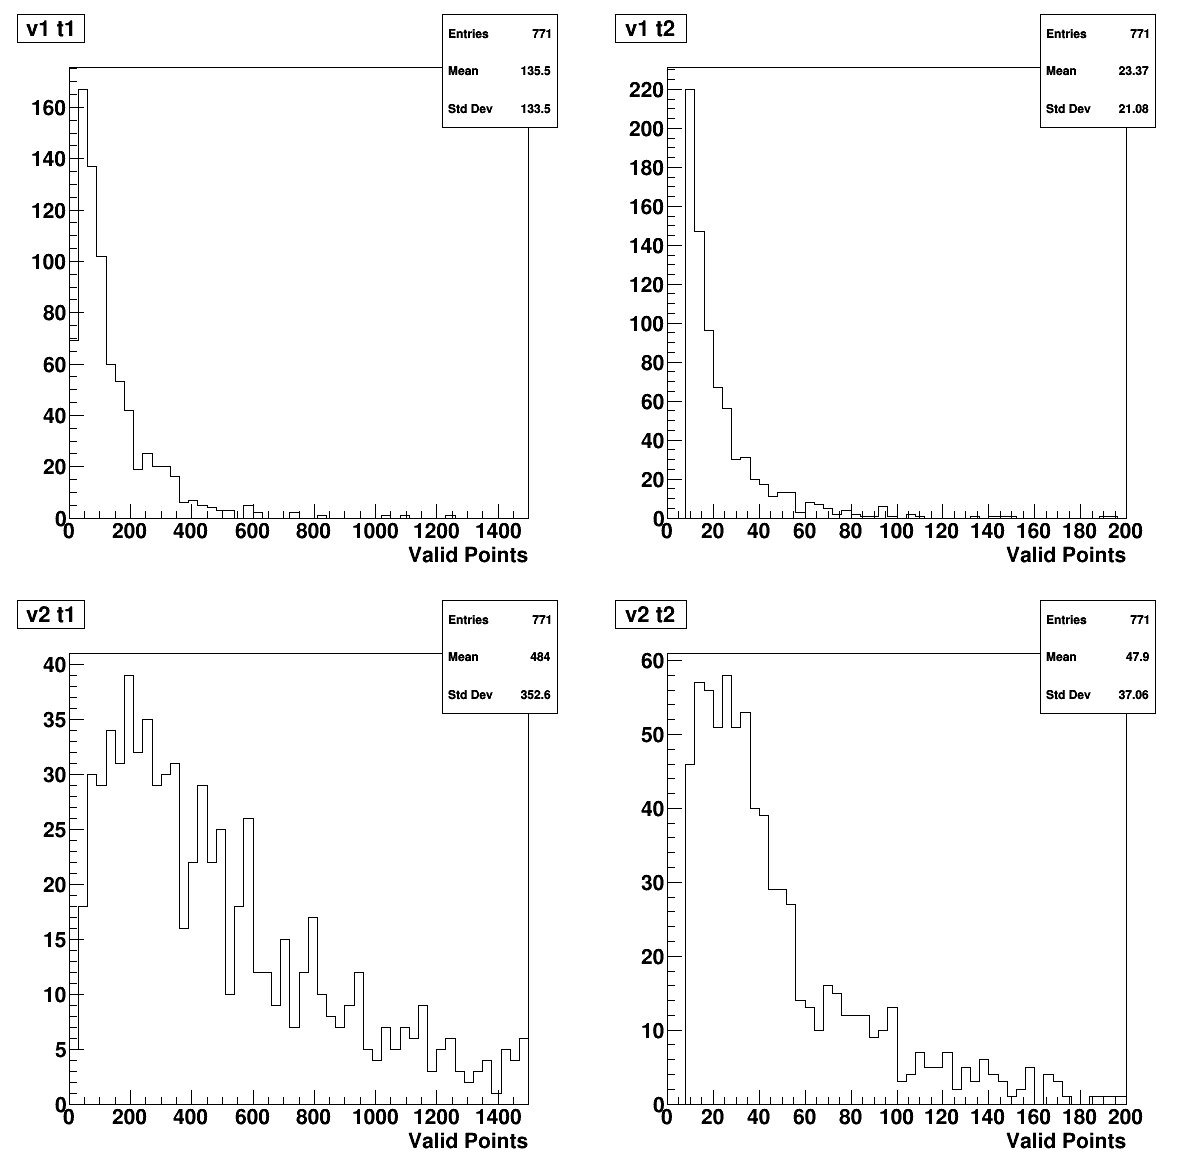

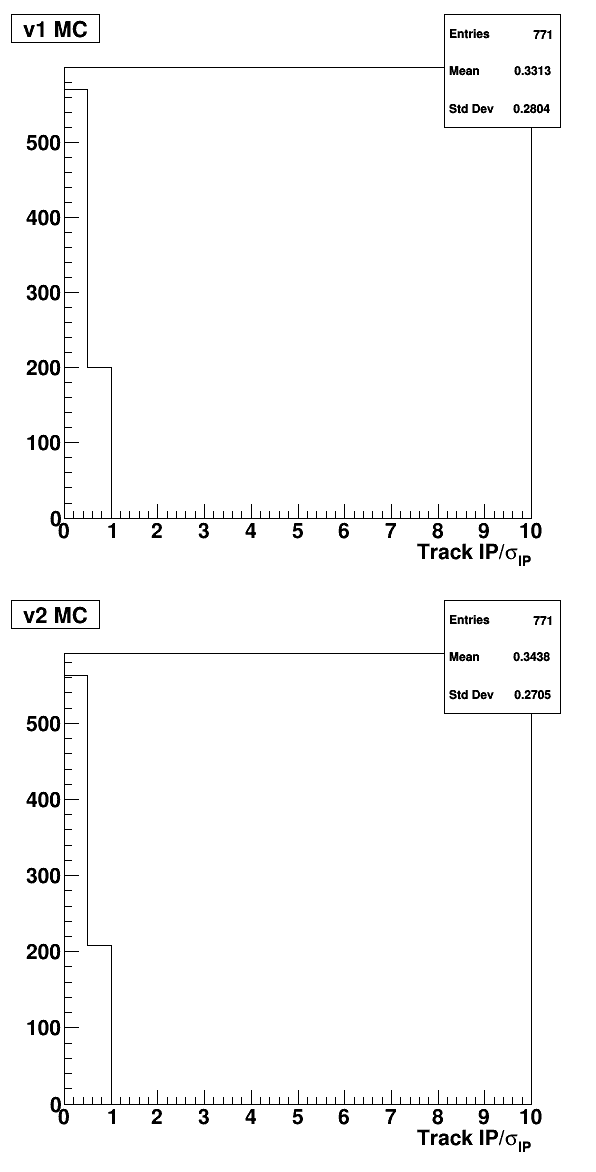

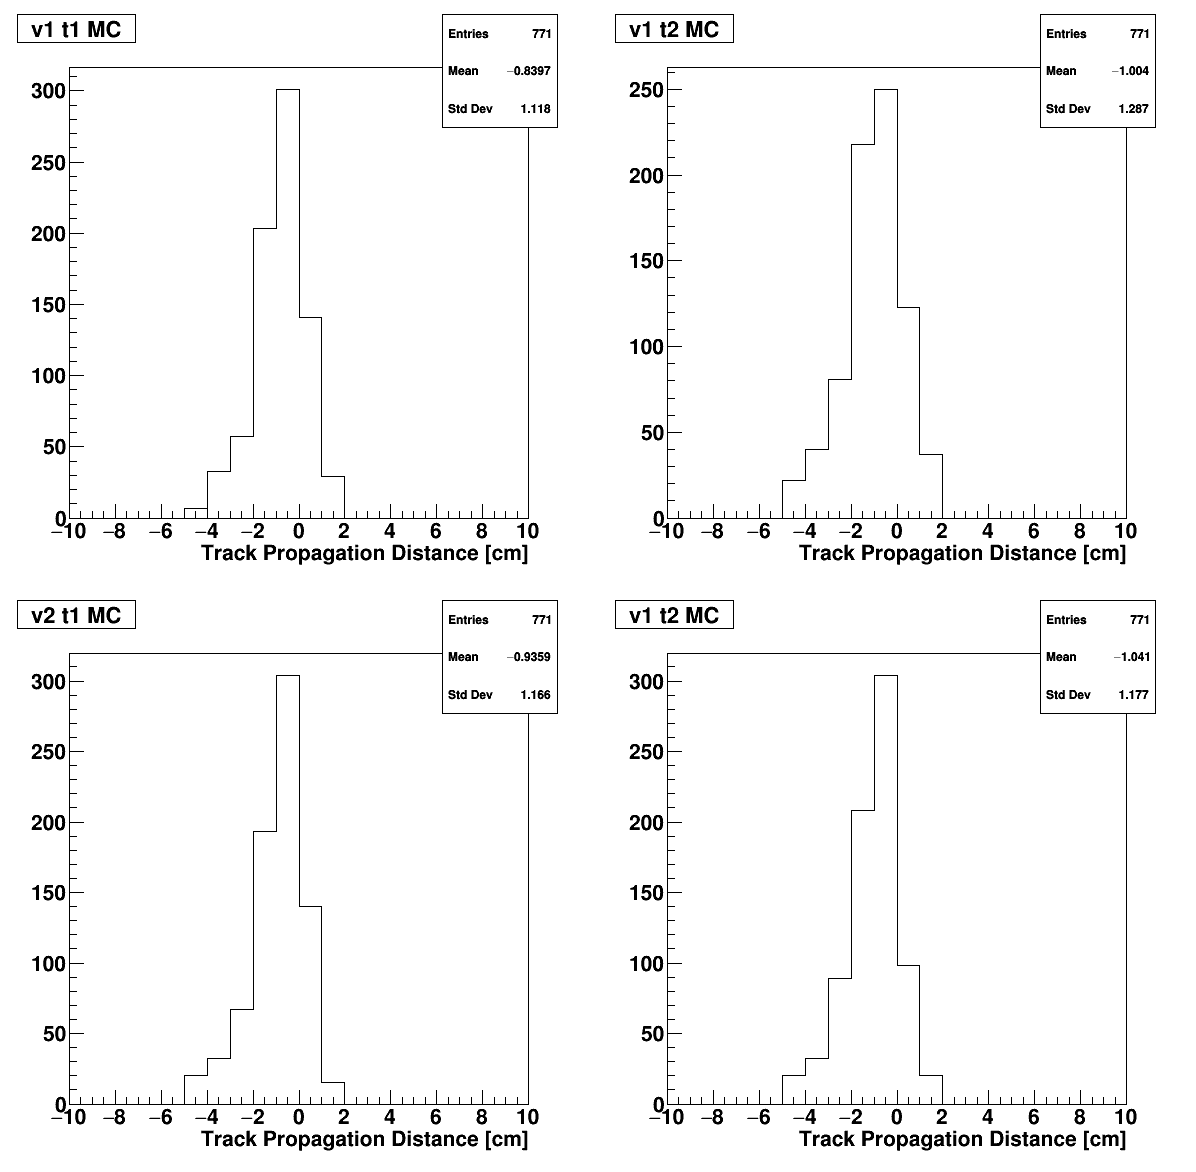

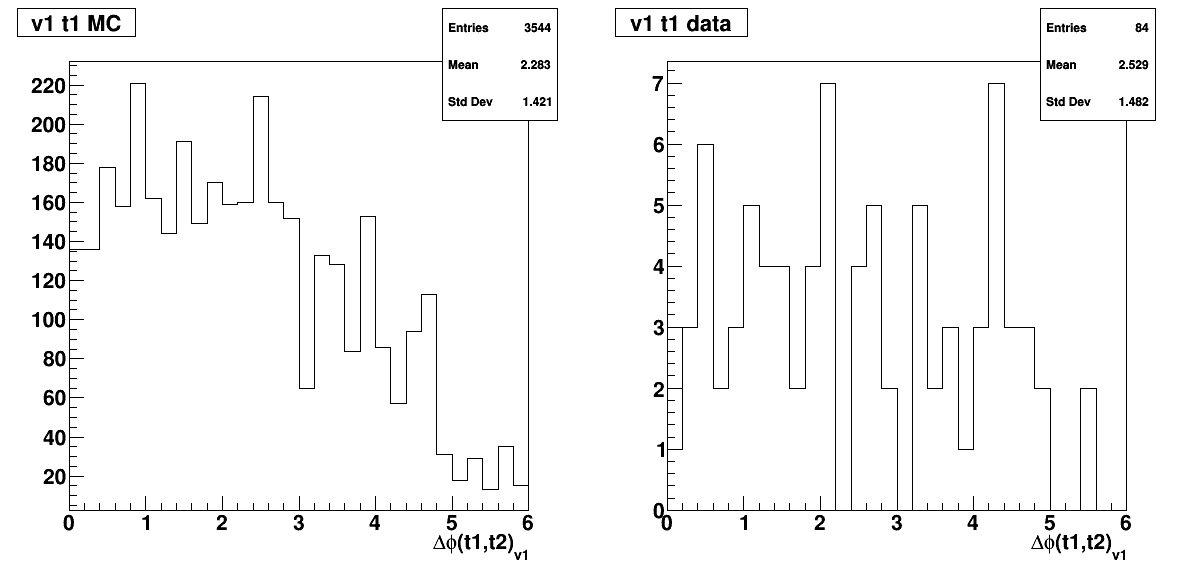

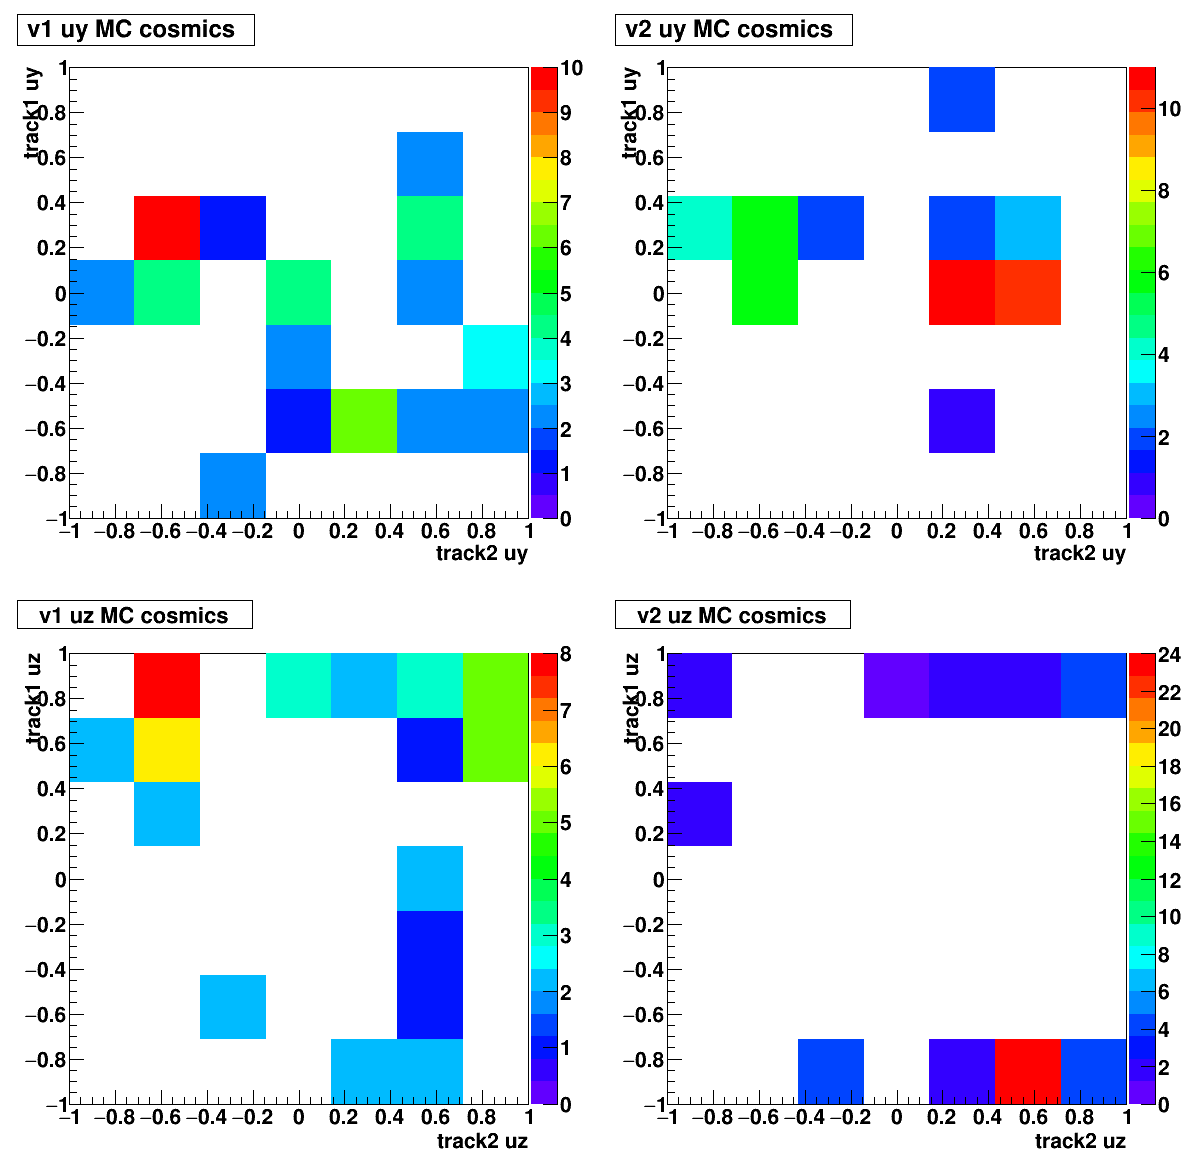

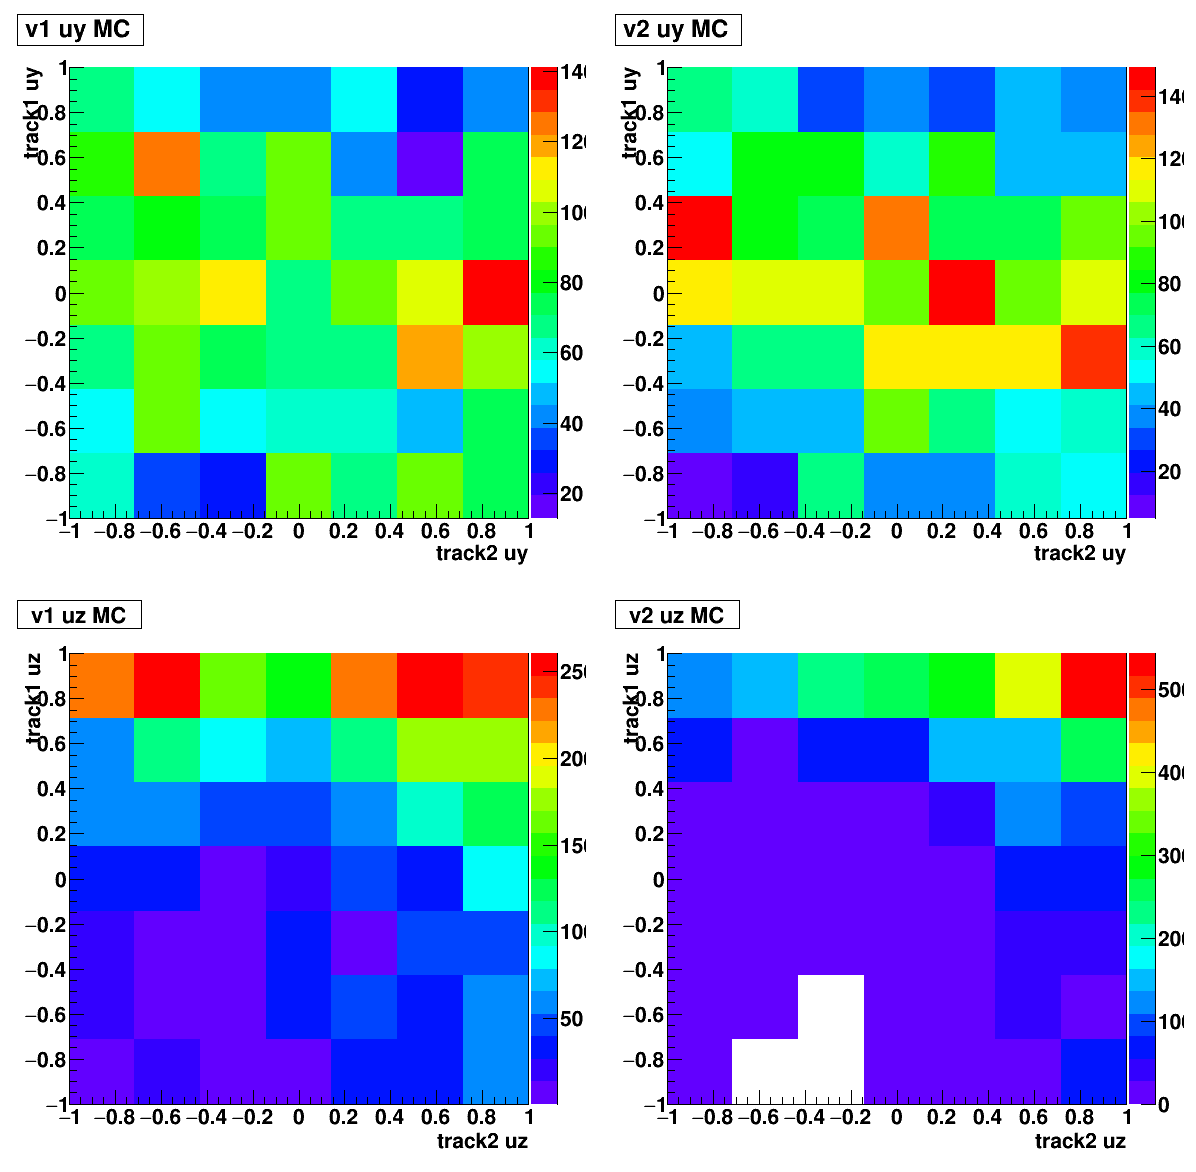

In [11]:
### Let's look at some basic plots for tracks in vertices ###
#
# Track Length
cl = R.TCanvas("cl","cl",1200,1200)
cl.Divide(2,2)
cl.Draw()
cl.cd(1)
hl10 = R.TH1F("hl10","v1 t1",50,0,500)
hl10.GetXaxis().SetTitle("Length [cm]")
t.Draw("max(tlength[v1tidx[0]],tlength[v1tidx[1]])>>hl10",cut12)
cl.cd(2)
hl11 = R.TH1F("hl11","v1 t2",50,0,100)
hl11.GetXaxis().SetTitle("Length [cm]")
t.Draw("min(tlength[v1tidx[0]],tlength[v1tidx[1]])>>hl11",cut12)
cl.cd(3)
hl20 = R.TH1F("hl20","v2 t1",50,0,500)
hl20.GetXaxis().SetTitle("Length [cm]")
t.Draw("max(tlength[v2tidx[0]],tlength[v2tidx[1]])>>hl20",cut12)
cl.cd(4)
hl21 = R.TH1F("hl21","v2 t2",50,0,100)
hl21.GetXaxis().SetTitle("Length [cm]")
t.Draw("min(tlength[v2tidx[0]],tlength[v2tidx[1]])>>hl21",cut12)
#
# Track NValid
cv = R.TCanvas("cv","cv",1200,1200)
cv.Divide(2,2)
cv.Draw()
cv.cd(1)
hv10 = R.TH1F("hv10","v1 t1",50,0,1500)
hv10.GetXaxis().SetTitle("Valid Points")
t.Draw("max(tnvalid[v1tidx[0]],tnvalid[v1tidx[1]])>>hv10",cut12)
cv.cd(2)
hv11 = R.TH1F("hv11","v1 t2",50,0,200)
hv11.GetXaxis().SetTitle("Valid Points")
t.Draw("min(tnvalid[v1tidx[0]],tnvalid[v1tidx[1]])>>hv11",cut12)
cv.cd(3)
hv20 = R.TH1F("hv20","v2 t1",50,0,1500)
hv20.GetXaxis().SetTitle("Valid Points")
t.Draw("max(tnvalid[v2tidx[0]],tnvalid[v2tidx[1]])>>hv20",cut12)
cv.cd(4)
hv21 = R.TH1F("hv21","v2 t2",50,0,200)
hv21.GetXaxis().SetTitle("Valid Points")
t.Draw("min(tnvalid[v2tidx[0]],tnvalid[v2tidx[1]])>>hv21",cut12)
#
# Track SIP
cdsippdv1m = R.TCanvas("cdsippdv1m","cdsippdv1m",600,1200)
cdsippdv1m.Divide(1,2)
cdsippdv1m.Draw()
cdsippdv1m.cd(1)
v1tsip0m = R.TH1F("v1tsip0m","v1 MC",20,0,10)
v1tsip0m.GetXaxis().SetTitle("Track IP/#sigma_{IP}")
t.Draw("v1tsip[0]>>v1tsip0m",cut12)
cdsippdv1m.cd(2)
v2tsip0m = R.TH1F("v2tsip0m","v2 MC",20,0,10)
v2tsip0m.GetXaxis().SetTitle("Track IP/#sigma_{IP}")
t.Draw("v2tsip[0]>>v2tsip0m",cut12)
#
# Track Propagation Distance
cdsippdv2m = R.TCanvas("cdsippdv2m","cdsippdv2m",1200,1200)
cdsippdv2m.Divide(2,2)
cdsippdv2m.Draw()
cdsippdv2m.cd(1)
v1tpd0m = R.TH1F("v1tpd0m","v1 t1 MC",20,-10,10)
v1tpd0m.GetXaxis().SetTitle("Track Propagation Distance [cm]")
t.Draw("v1tpd[0]>>v1tpd0m",cut12)
cdsippdv2m.cd(2)
v1tpd1m = R.TH1F("v1tpd1m","v1 t2 MC",20,-10,10)
v1tpd1m.GetXaxis().SetTitle("Track Propagation Distance [cm]")
t.Draw("v1tpd[1]>>v1tpd1m",cut12)
cdsippdv2m.cd(3)
v2tpd0m = R.TH1F("v2tpd0m","v2 t1 MC",20,-10,10)
v2tpd0m.GetXaxis().SetTitle("Track Propagation Distance [cm]")
t.Draw("v2tpd[0]>>v2tpd0m",cut12)
cdsippdv2m.cd(4)
v2tpd1m = R.TH1F("v2tpd1m","v1 t2 MC",20,-10,10)
v2tpd1m.GetXaxis().SetTitle("Track Propagation Distance [cm]")
t.Draw("v2tpd[1]>>v2tpd1m",cut12)
#
# Track DeltaPhi
cdp = R.TCanvas("cdp","cdp",1200,600)
cdp.Divide(2)
cdp.Draw()
cdp.cd(1)
hdpmc = R.TH1F("hdpmc","v1 t1 MC",30,0,6)
hdpmc.GetXaxis().SetTitle("#Delta#phi(t1,t2)_{v1}")
t.Draw("abs(atan2(tk_vtx_uy[v1tidx[0]],tk_vtx_ux[v1tidx[0]])-atan2(tk_vtx_uy[v1tidx[1]],tk_vtx_ux[v1tidx[1]]))>>hdpmc",cut12+nucut)
cdp.cd(2)
hdpda = R.TH1F("hdpda","v1 t1 data",30,0,6)
hdpda.GetXaxis().SetTitle("#Delta#phi(t1,t2)_{v1}")
td.Draw("abs(atan2(tk_vtx_uy[v1tidx[0]],tk_vtx_ux[v1tidx[0]])-atan2(tk_vtx_uy[v1tidx[1]],tk_vtx_ux[v1tidx[1]]))>>hdpda",cut12)
#
#
# Track Directions2D MC Cosmic
ctdmc = R.TCanvas("ctdmc","ctdmc",1200,1200)
ctdmc.Divide(2,2)
ctdmc.Draw()
ctdmc.cd(1)
hv1uy1uy2mc = R.TH2F("hv1uy1uy2mc","v1 uy MC cosmics",7,-1,1,7,-1,1)
hv1uy1uy2mc.SetStats(0)
t.Draw("tk_vtx_uy[v1tidx[0]]:tk_vtx_uy[v1tidx[1]]>>hv1uy1uy2mc",cut12+crcut,"goff")
hv1uy1uy2mc.GetXaxis().SetTitle("track2 uy")
hv1uy1uy2mc.GetYaxis().SetTitle("track1 uy")
hv1uy1uy2mc.Draw("colz")
ctdmc.cd(2)
hv2uy1uy2mc = R.TH2F("hv2uy1uy2mc","v2 uy MC cosmics",7,-1,1,7,-1,1)
hv2uy1uy2mc.SetStats(0)
t.Draw("tk_vtx_uy[v2tidx[0]]:tk_vtx_uy[v2tidx[1]]>>hv2uy1uy2mc",cut12+crcut,"goff")
hv2uy1uy2mc.GetXaxis().SetTitle("track2 uy")
hv2uy1uy2mc.GetYaxis().SetTitle("track1 uy")
hv2uy1uy2mc.Draw("colz")
ctdmc.cd(3)
hv1uz1uz2mc = R.TH2F("hv1uz1uz2mc","v1 uz MC cosmics",7,-1,1,7,-1,1)
hv1uz1uz2mc.SetStats(0)
t.Draw("tk_vtx_uz[v1tidx[0]]:tk_vtx_uz[v1tidx[1]]>>hv1uz1uz2mc",cut12+crcut,"goff")
hv1uz1uz2mc.GetXaxis().SetTitle("track2 uz")
hv1uz1uz2mc.GetYaxis().SetTitle("track1 uz")
hv1uz1uz2mc.Draw("colz")
ctdmc.cd(4)
hv2uz1uz2mc = R.TH2F("hv2uz1uz2mc","v2 uz MC cosmics",7,-1,1,7,-1,1)
hv2uz1uz2mc.SetStats(0)
t.Draw("tk_vtx_uz[v2tidx[0]]:tk_vtx_uz[v2tidx[1]]>>hv2uz1uz2mc",cut12+crcut,"goff")
hv2uz1uz2mc.GetXaxis().SetTitle("track2 uz")
hv2uz1uz2mc.GetYaxis().SetTitle("track1 uz")
hv2uz1uz2mc.Draw("colz")
#
# Track Directions2D MC Nu
ctdm = R.TCanvas("ctdm","ctdm",1200,1200)
ctdm.Divide(2,2)
ctdm.Draw()
ctdm.cd(1)
hv1uy1uy2m = R.TH2F("hv1uy1uy2m","v1 uy MC",7,-1,1,7,-1,1)
hv1uy1uy2m.SetStats(0)
t.Draw("tk_vtx_uy[v1tidx[0]]:tk_vtx_uy[v1tidx[1]]>>hv1uy1uy2m",cut12+nucut,"goff")
hv1uy1uy2m.GetXaxis().SetTitle("track2 uy")
hv1uy1uy2m.GetYaxis().SetTitle("track1 uy")
hv1uy1uy2m.Draw("colz")
ctdm.cd(2)
hv2uy1uy2m = R.TH2F("hv2uy1uy2m","v2 uy MC",7,-1,1,7,-1,1)
hv2uy1uy2m.SetStats(0)
t.Draw("tk_vtx_uy[v2tidx[0]]:tk_vtx_uy[v2tidx[1]]>>hv2uy1uy2m",cut12+nucut,"goff")
hv2uy1uy2m.GetXaxis().SetTitle("track2 uy")
hv2uy1uy2m.GetYaxis().SetTitle("track1 uy")
hv2uy1uy2m.Draw("colz")
ctdm.cd(3)
hv1uz1uz2m = R.TH2F("hv1uz1uz2m","v1 uz MC",7,-1,1,7,-1,1)
hv1uz1uz2m.SetStats(0)
t.Draw("tk_vtx_uz[v1tidx[0]]:tk_vtx_uz[v1tidx[1]]>>hv1uz1uz2m",cut12+nucut,"goff")
hv1uz1uz2m.GetXaxis().SetTitle("track2 uz")
hv1uz1uz2m.GetYaxis().SetTitle("track1 uz")
hv1uz1uz2m.Draw("colz")
ctdm.cd(4)
hv2uz1uz2m = R.TH2F("hv2uz1uz2m","v2 uz MC",7,-1,1,7,-1,1)
hv2uz1uz2m.SetStats(0)
t.Draw("tk_vtx_uz[v2tidx[0]]:tk_vtx_uz[v2tidx[1]]>>hv2uz1uz2m",cut12+nucut,"goff")
hv2uz1uz2m.GetXaxis().SetTitle("track2 uz")
hv2uz1uz2m.GetYaxis().SetTitle("track1 uz")
hv2uz1uz2m.Draw("colz")
#

771L

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cs
Warning in <TCanvas::Constructor>: Deleting canvas with same name: cv
Warning in <TCanvas::Constructor>: Deleting canvas with same name: cc


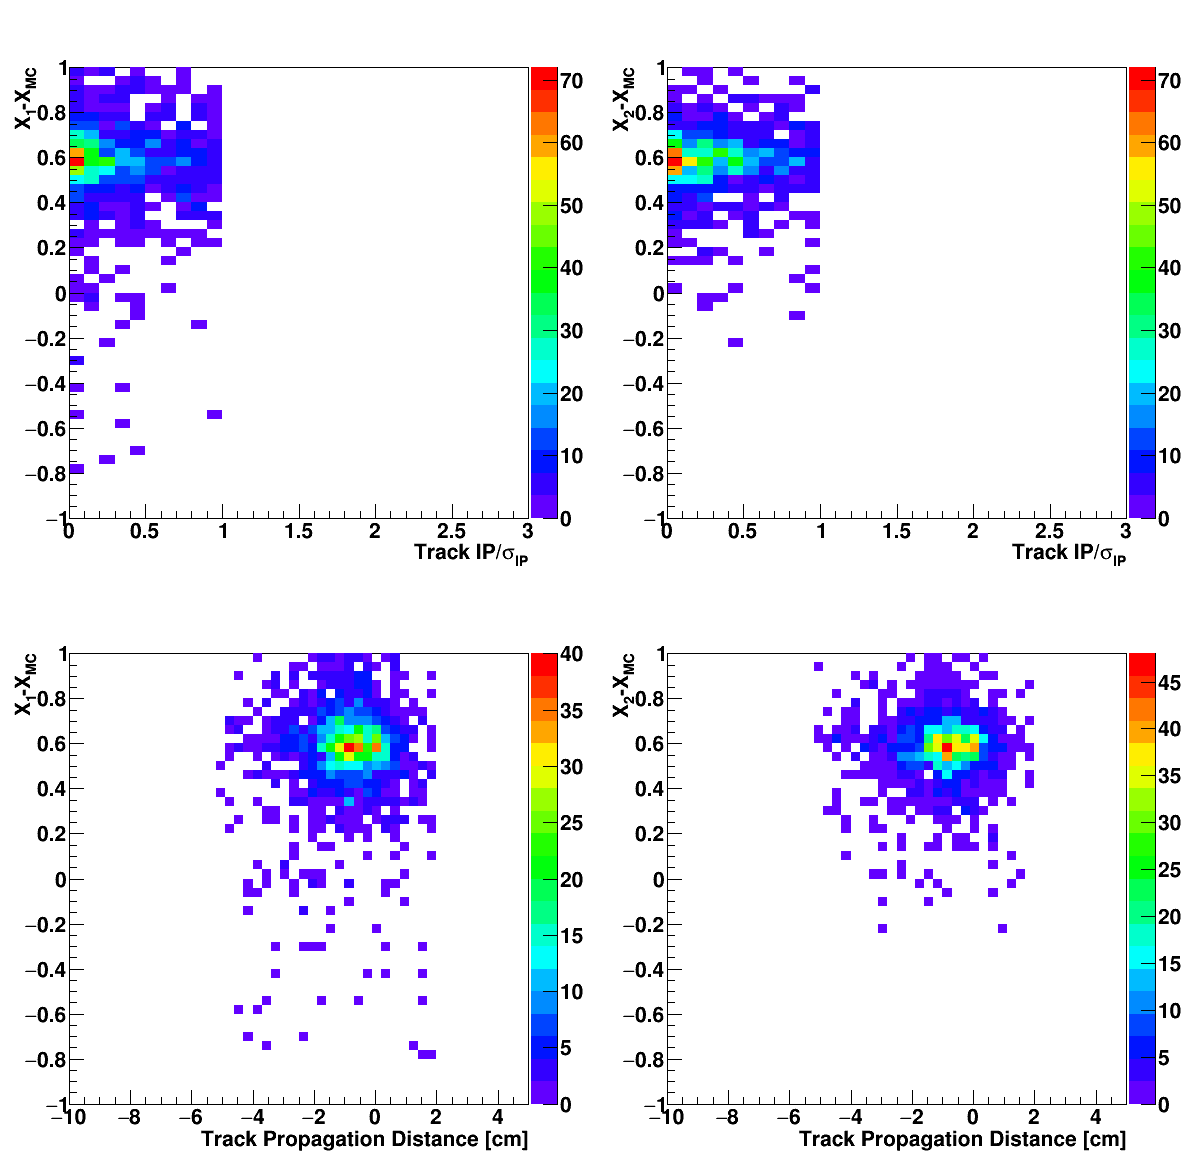

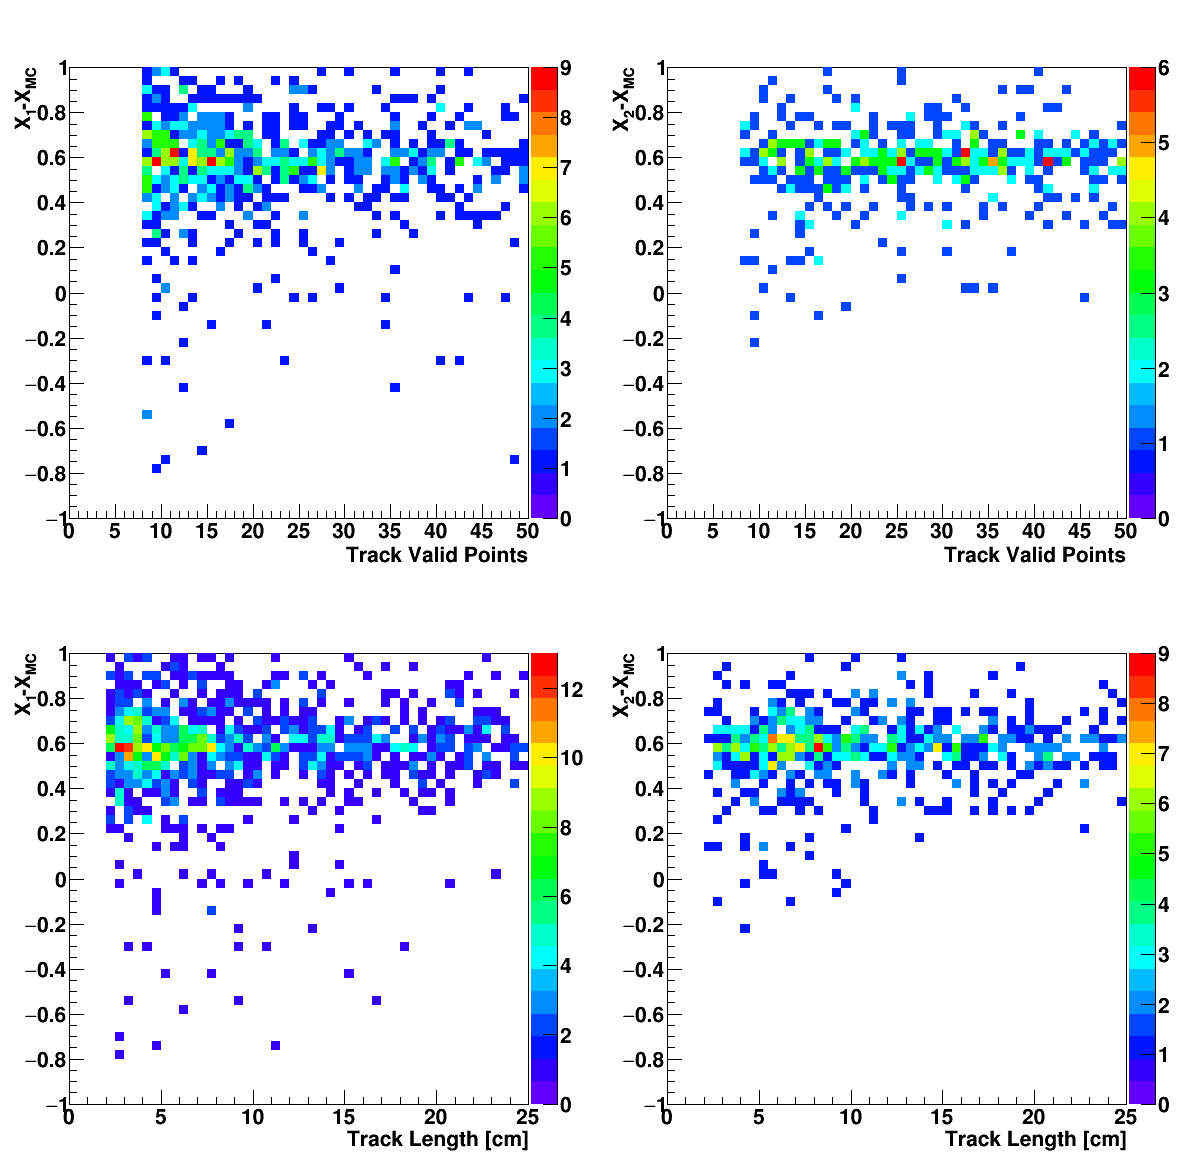

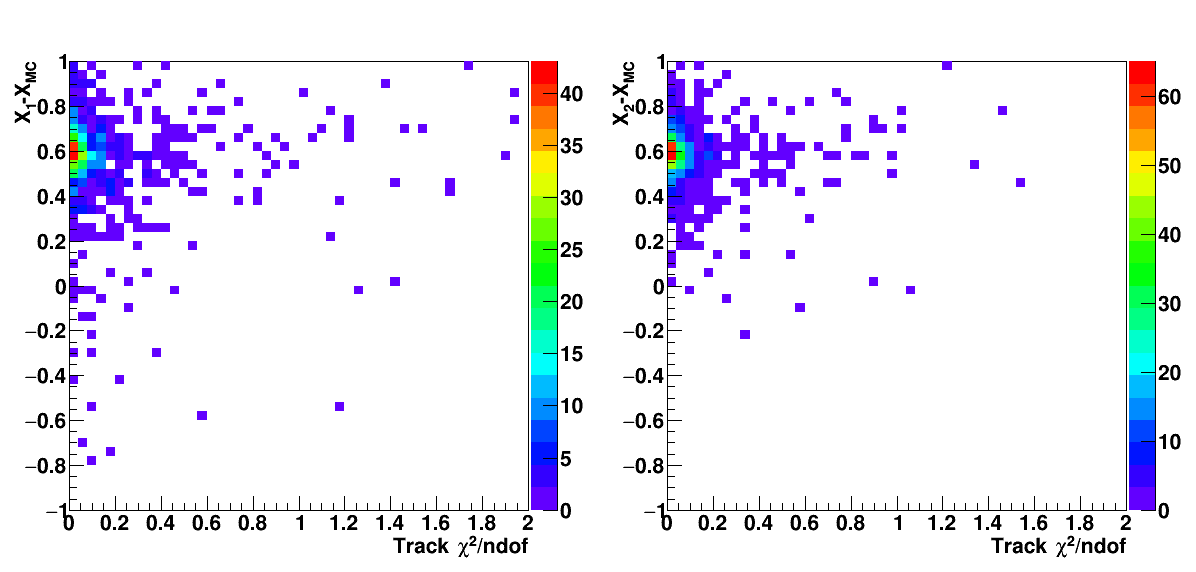

In [12]:
### Let's look at some basic plots for vertices ###
#
# Resolution vs ipSig and PropD
cs = R.TCanvas("cs","cs",1200,1200)
cs.Divide(2,2)
cs.Draw()
cs.cd(1)
hsx1 = R.TH2F("hsx1","",30,0,3,50,-1,1)
hsx1.GetXaxis().SetTitle("Track IP/#sigma_{IP}")
hsx1.GetYaxis().SetTitleOffset(1.2)
hsx1.GetYaxis().SetTitle("X_{1}-X_{MC}")
hsx1.SetStats(0)
t.Draw("v1pos[0]-mcpos[0]:v1tsip>>hsx1",cut12,"colz")
cs.cd(2)
hsx2 = R.TH2F("hsx2","",30,0,3,50,-1,1)
hsx2.GetXaxis().SetTitle("Track IP/#sigma_{IP}")
hsx2.GetYaxis().SetTitleOffset(1.2)
hsx2.GetYaxis().SetTitle("X_{2}-X_{MC}")
hsx2.SetStats(0)
t.Draw("v2pos[0]-mcpos[0]:v2tsip>>hsx2",cut12,"colz")
cs.cd(3)
hdx1 = R.TH2F("hdx1","",50,-10,5,50,-1,1)
hdx1.GetXaxis().SetTitle("Track Propagation Distance [cm]")
hdx1.GetYaxis().SetTitleOffset(1.2)
hdx1.GetYaxis().SetTitle("X_{1}-X_{MC}")
hdx1.SetStats(0)
t.Draw("v1pos[0]-mcpos[0]:v1tpd>>hdx1",cut12,"colz")
cs.cd(4)
hdx2 = R.TH2F("hdx2","",50,-10,5,50,-1,1)
hdx2.GetXaxis().SetTitle("Track Propagation Distance [cm]")
hdx2.GetYaxis().SetTitleOffset(1.2)
hdx2.GetYaxis().SetTitle("X_{2}-X_{MC}")
hdx2.SetStats(0)
t.Draw("v2pos[0]-mcpos[0]:v2tpd>>hdx2",cut12,"colz")
#
# Resolution vs NValid and Length
cv = R.TCanvas("cv","cv",1200,1200)
cv.Divide(2,2)
cv.Draw()
cv.cd(1)
hvx1 = R.TH2F("hvx1","",50,0,50,50,-1,1)
hvx1.GetXaxis().SetTitle("Track Valid Points")
hvx1.GetYaxis().SetTitleOffset(1.2)
hvx1.GetYaxis().SetTitle("X_{1}-X_{MC}")
hvx1.SetStats(0)
t.Draw("v1pos[0]-mcpos[0]:tnvalid[v1tidx]>>hvx1",cut12,"colz")
cv.cd(2)
hvx2 = R.TH2F("hvx2","",50,0,50,50,-1,1)
hvx2.GetXaxis().SetTitle("Track Valid Points")
hvx2.GetYaxis().SetTitleOffset(1.2)
hvx2.GetYaxis().SetTitle("X_{2}-X_{MC}")
hvx2.SetStats(0)
t.Draw("v2pos[0]-mcpos[0]:tnvalid[v2tidx]>>hvx2",cut12,"colz")
cv.cd(3)
hlx1 = R.TH2F("hlx1","",50,0,25,50,-1,1)
hlx1.GetXaxis().SetTitle("Track Length [cm]")
hlx1.GetYaxis().SetTitleOffset(1.2)
hlx1.GetYaxis().SetTitle("X_{1}-X_{MC}")
hlx1.SetStats(0)
t.Draw("v1pos[0]-mcpos[0]:tlength[v1tidx]>>hlx1",cut12,"colz")
cv.cd(4)
hlx2 = R.TH2F("hlx2","",50,0,25,50,-1,1)
hlx2.GetXaxis().SetTitle("Track Length [cm]")
hlx2.GetYaxis().SetTitleOffset(1.2)
hlx2.GetYaxis().SetTitle("X_{2}-X_{MC}")
hlx2.SetStats(0)
t.Draw("v2pos[0]-mcpos[0]:tlength[v2tidx]>>hlx2",cut12,"colz")
#
# Resolution vs NChi2
cc = R.TCanvas("cc","cc",1200,600)
cc.Divide(2)
cc.Draw()
cc.cd(1)
hcx1 = R.TH2F("hcx1","",50,0,2,50,-1,1)
hcx1.GetXaxis().SetTitle("Track #chi^{2}/ndof")
hcx1.GetYaxis().SetTitleOffset(1.2)
hcx1.GetYaxis().SetTitle("X_{1}-X_{MC}")
hcx1.SetStats(0)
t.Draw("v1pos[0]-mcpos[0]:tchi2[v1tidx[0]]/tndof[v1tidx[0]]>>hcx1",cut12,"colz")
cc.cd(2)
hcx2 = R.TH2F("hcx2","",50,0,2,50,-1,1)
hcx2.GetXaxis().SetTitle("Track #chi^{2}/ndof")
hcx2.GetYaxis().SetTitleOffset(1.2)
hcx2.GetYaxis().SetTitle("X_{2}-X_{MC}")
hcx2.SetStats(0)
t.Draw("v2pos[0]-mcpos[0]:tchi2[v2tidx[0]]/tndof[v2tidx[0]]>>hcx2",cut12,"colz")
#
#c00 = R.TCanvas("c00","c00",600,600)
#c00.Draw()
#td.Draw("tlength[v2tidx[0]]>>(20,0,20)","v2status==2 && v2tstatus[0]==3 && v2tstatus[1]==3")#tk_vtx_uy[]
#t.Draw("v2tidx[0]")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cx1
Info in <TCanvas::Print>: png file xres-mc1.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: cx2
Info in <TCanvas::Print>: png file xres-mc2.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: cx12
Info in <TCanvas::Print>: png file xres-mc12.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: cy1
Info in <TCanvas::Print>: png file yres-mc1.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: cy2
Info in <TCanvas::Print>: png file yres-mc2.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: cy12
Info in <TCanvas::Print>: png file yres-mc12.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: cz1
Info in <TCanvas::Print>: png file zres-mc1.png has been created
Warning in <TCanvas::Constructor>: Deleting 

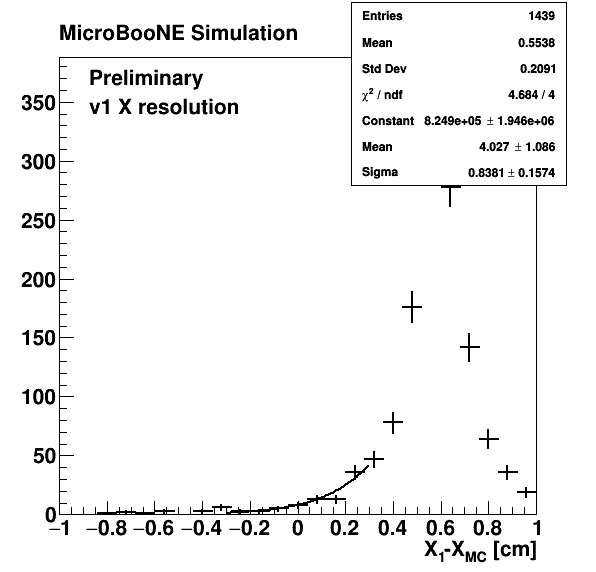

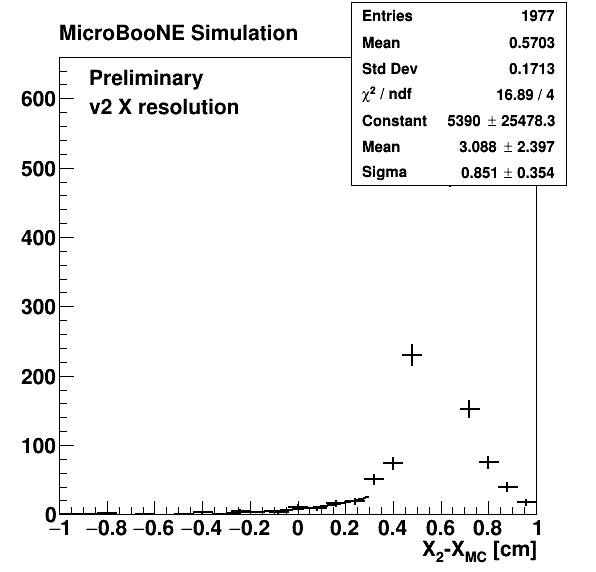

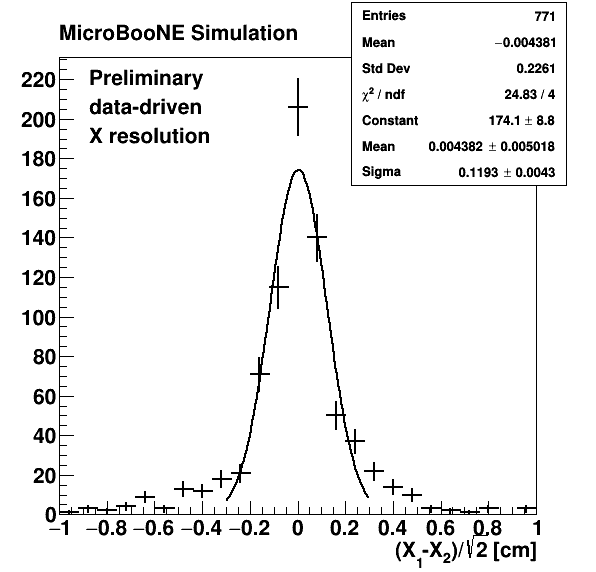

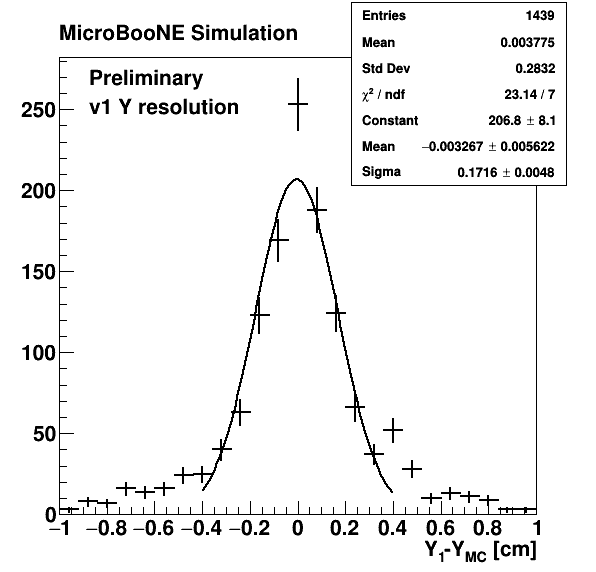

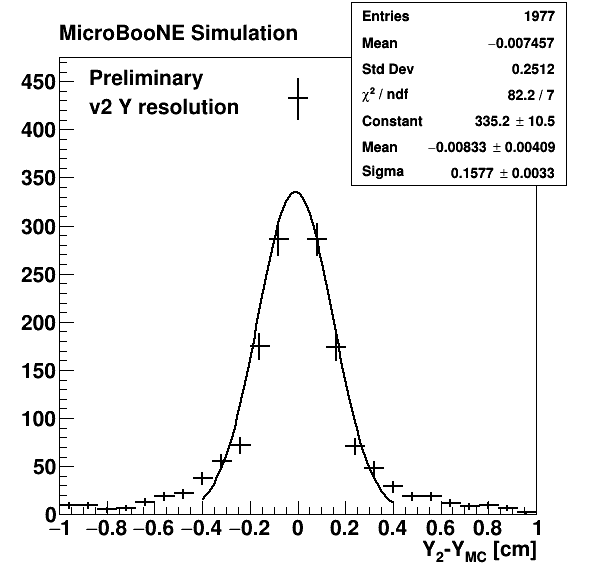

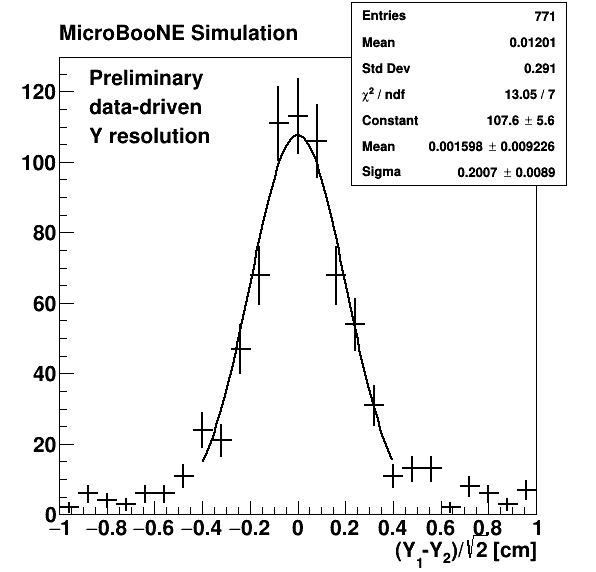

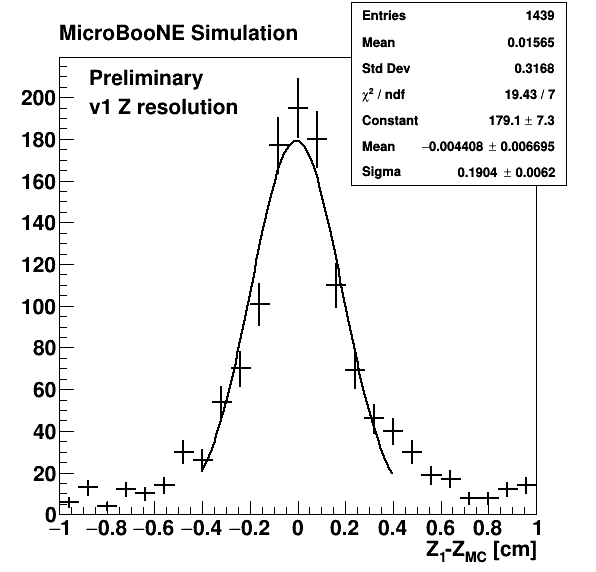

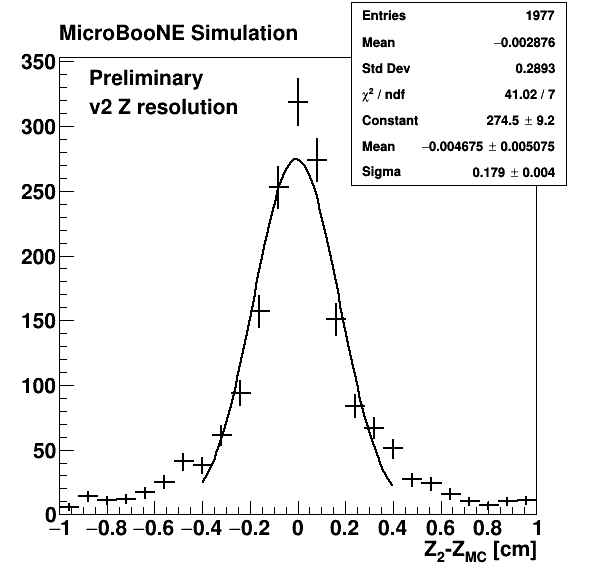

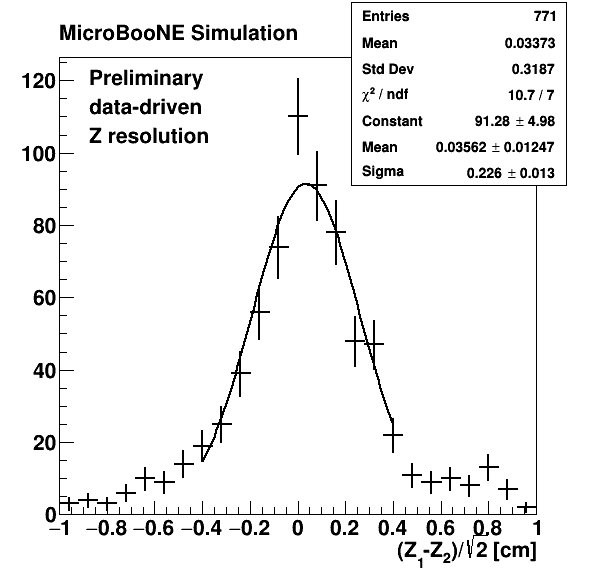

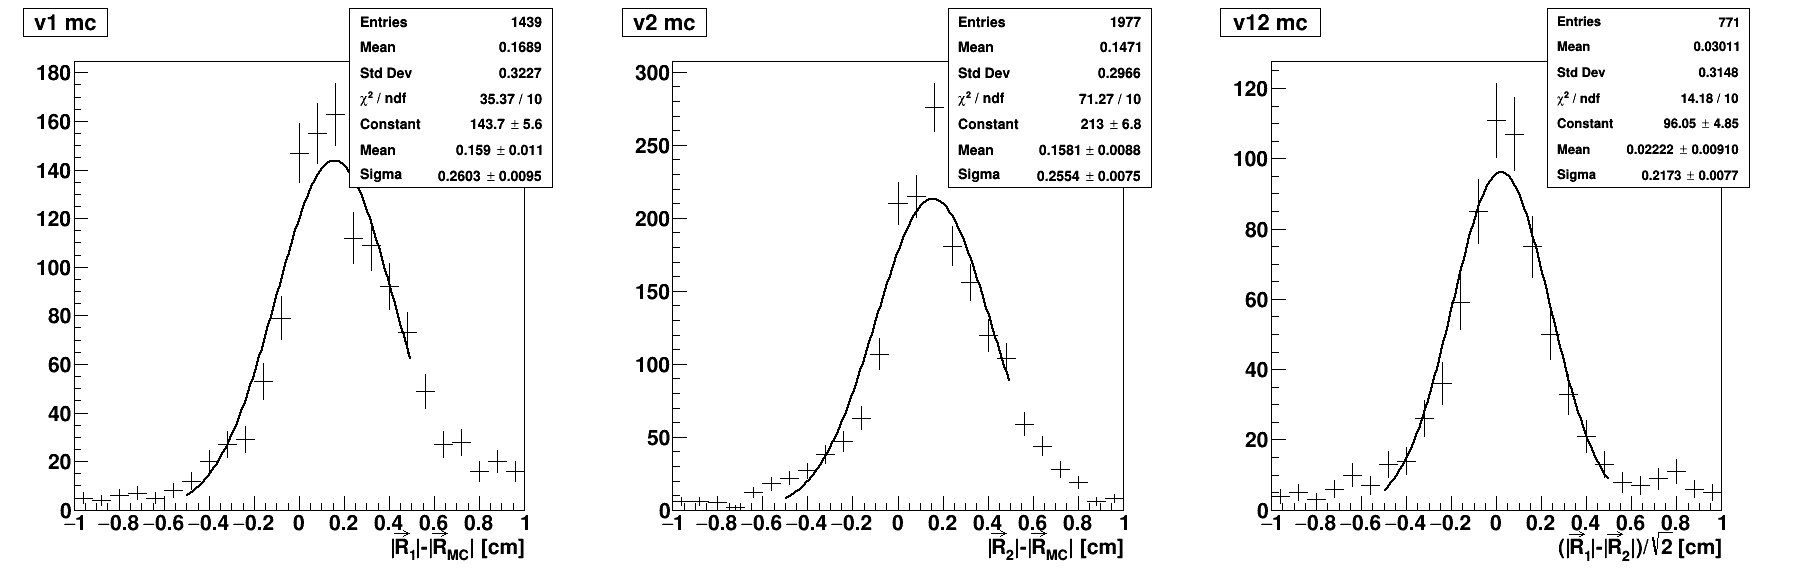

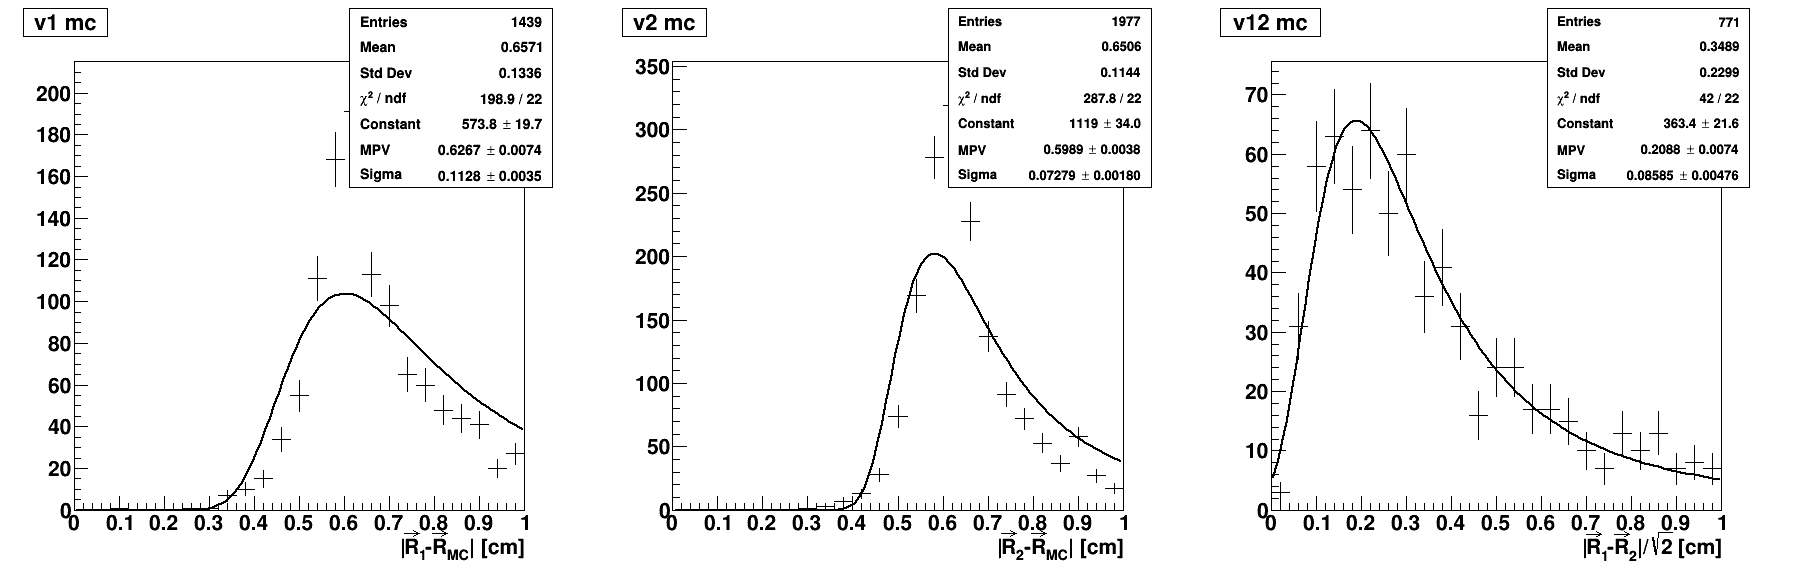

In [13]:
R.gStyle.SetOptStat(1110)
R.gStyle.SetStatX(0.95)

label = R.TText()
label.SetNDC()
label.SetTextFont(1)
label.SetTextColor(1)
label.SetTextSize(0.04)
label.SetTextAlign(11)
label.SetTextAngle(0)

### Plots MC only ###
#
# X resolution: v1, v2, v12
#cx = R.TCanvas("cx","cx",1800,600)
#cx.Divide(3)
#cx.Draw()
#cx.cd(1)
cx1 = R.TCanvas("cx1","cx1",600,600)
cx1.Draw()
hx21 = R.TH1F("hx21","",25,-1,1)#talk: 25, update:20
hx21.GetXaxis().SetTitle("X_{1}-X_{MC} [cm]")
hx21.SetLineWidth(2)
t.Draw("v1pos[0]-mcpos[0]>>hx21",cut1,"E")
hx21.Fit("gaus","MLEQS","",-0.3,0.3)#talk: 0.2, update:0.35, MLEQS
label.DrawText(0.1, 0.93, "MicroBooNE Simulation")
label.DrawText(0.15, 0.85, "Preliminary")
label.DrawText(0.15, 0.8, "v1 X resolution")
#label.DrawText(0.15, 0.75, "BNB MC")
cx1.SaveAs("xres-mc1.png")
#cx.cd(2)
cx2 = R.TCanvas("cx2","cx2",600,600)
cx2.Draw()
hx22 = R.TH1F("hx22","",25,-1,1)#talk: 25, update:20
hx22.GetXaxis().SetTitle("X_{2}-X_{MC} [cm]")
hx22.SetLineWidth(2)
t.Draw("v2pos[0]-mcpos[0]>>hx22",cut2,"E")
hx22.Fit("gaus","MLEQS","",-0.3,0.3)#talk: 0.2, update:0.35, MLEQS
label.DrawText(0.1, 0.93, "MicroBooNE Simulation")
label.DrawText(0.15, 0.85, "Preliminary")
label.DrawText(0.15, 0.8, "v2 X resolution")
#label.DrawText(0.15, 0.75, "BNB MC")
cx2.SaveAs("xres-mc2.png")
#cx.cd(3)
cx12 = R.TCanvas("cx12","cx12",600,600)
cx12.Draw()
hx122 = R.TH1F("hx122","",25,-1,1)#talk: 25, update:20
hx122.GetXaxis().SetTitle("(X_{1}-X_{2})/#sqrt{2} [cm]")
hx122.SetLineWidth(2)
t.Draw("(v1pos[0]-v2pos[0])*0.7071>>hx122",cut12,"E")
label.DrawText(0.1, 0.93, "MicroBooNE Simulation")
label.DrawText(0.15, 0.85, "Preliminary")
label.DrawText(0.15, 0.8, "data-driven")
label.DrawText(0.15, 0.75, "X resolution")
#label.DrawText(0.15, 0.7, "BNB MC")
hx122.Fit("gaus","MLEQS","",-0.3,0.3)#talk: 0.2, update:0.35, MLEQS
cx12.SaveAs("xres-mc12.png")
#
# Y resolution: v1, v2, v12
#cy = R.TCanvas("cy","cy",1800,600)
#cy.Divide(3)
#cy.Draw()
#cy.cd(1)
cy1 = R.TCanvas("cy1","cy1",600,600)
cy1.Draw()
hy21 = R.TH1F("hy21","",25,-1,1)#talk: 25, update:20
hy21.GetXaxis().SetTitle("Y_{1}-Y_{MC} [cm]")
hy21.SetLineWidth(2)
t.Draw("v1pos[1]-mcpos[1]>>hy21",cut1,"E")
hy21.Fit("gaus","MLEQS","",-0.4,0.4)#talk: 0.3, update:0.35, MLEQS
label.DrawText(0.1, 0.93, "MicroBooNE Simulation")
label.DrawText(0.15, 0.85, "Preliminary")
label.DrawText(0.15, 0.8, "v1 Y resolution")
#label.DrawText(0.15, 0.75, "BNB MC")
cy1.SaveAs("yres-mc1.png")
#cy.cd(2)
cy2 = R.TCanvas("cy2","cy2",600,600)
cy2.Draw()
hy22 = R.TH1F("hy22","",25,-1,1)#talk: 25, update:20
hy22.GetXaxis().SetTitle("Y_{2}-Y_{MC} [cm]")
hy22.SetLineWidth(2)
t.Draw("v2pos[1]-mcpos[1]>>hy22",cut2,"E")
hy22.Fit("gaus","MLEQS","",-0.4,0.4)#talk: 0.3, update:0.35, MLEQS
label.DrawText(0.1, 0.93, "MicroBooNE Simulation")
label.DrawText(0.15, 0.85, "Preliminary")
label.DrawText(0.15, 0.8, "v2 Y resolution")
#label.DrawText(0.15, 0.75, "BNB MC")
cy2.SaveAs("yres-mc2.png")
#cy.cd(3)
cy12 = R.TCanvas("cy12","cy12",600,600)
cy12.Draw()
hy122 = R.TH1F("hy122","",25,-1,1)#talk: 25, update:20
hy122.GetXaxis().SetTitle("(Y_{1}-Y_{2})/#sqrt{2} [cm]")
hy122.SetLineWidth(2)
t.Draw("(v1pos[1]-v2pos[1])*0.7071>>hy122",cut12,"E")
hy122.Fit("gaus","MLEQS","",-0.4,0.4)#talk: 0.3, update:0.35, MLEQS
label.DrawText(0.1, 0.93, "MicroBooNE Simulation")
label.DrawText(0.15, 0.85, "Preliminary")
label.DrawText(0.15, 0.8, "data-driven")
label.DrawText(0.15, 0.75, "Y resolution")
#label.DrawText(0.15, 0.7, "BNB MC")
cy12.SaveAs("yres-mc12.png")
#
# Z resolution: v1, v2, v12
#cz = R.TCanvas("cz","cz",1800,600)
#cz.Divide(3)
#cz.Draw()
#cz.cd(1)
cz1 = R.TCanvas("cz1","cz1",600,600)
cz1.Draw()
hz21 = R.TH1F("hz21","",25,-1,1)#talk: 25, update:20
hz21.GetXaxis().SetTitle("Z_{1}-Z_{MC} [cm]")
hz21.SetLineWidth(2)
t.Draw("v1pos[2]-mcpos[2]>>hz21",cut1,"E")
hz21.Fit("gaus","MLEQS","",-0.4,0.4)#talk: 0.3, update:0.35, MLEQS
label.DrawText(0.1, 0.93, "MicroBooNE Simulation")
label.DrawText(0.15, 0.85, "Preliminary")
label.DrawText(0.15, 0.8, "v1 Z resolution")
#label.DrawText(0.15, 0.75, "BNB MC")
cz1.SaveAs("zres-mc1.png")
#cz.cd(2)
cz2 = R.TCanvas("cz2","cz2",600,600)
cz2.Draw()
hz22 = R.TH1F("hz22","",25,-1,1)#talk: 25, update:20
hz22.GetXaxis().SetTitle("Z_{2}-Z_{MC} [cm]")
hz22.SetLineWidth(2)
t.Draw("v2pos[2]-mcpos[2]>>hz22",cut2,"E")
hz22.Fit("gaus","MLEQS","",-0.4,0.4)#talk: 0.3, update:0.35, MLEQS
label.DrawText(0.1, 0.93, "MicroBooNE Simulation")
label.DrawText(0.15, 0.85, "Preliminary")
label.DrawText(0.15, 0.8, "v2 Z resolution")
#label.DrawText(0.15, 0.75, "BNB MC")
cz2.SaveAs("zres-mc2.png")
#cz.cd(3)
cz12 = R.TCanvas("cz12","cz12",600,600)
cz12.Draw()
hz122 = R.TH1F("hz122","",25,-1,1)#talk: 25, update:20
hz122.GetXaxis().SetTitle("(Z_{1}-Z_{2})/#sqrt{2} [cm]")
hz122.SetLineWidth(2)
t.Draw("(v1pos[2]-v2pos[2])*0.7071>>hz122",cut12,"E")
hz122.Fit("gaus","MLEQS","",-0.4,0.4)#talk: 0.3, update:0.35, MLEQS
label.DrawText(0.1, 0.93, "MicroBooNE Simulation")
label.DrawText(0.15, 0.85, "Preliminary")
label.DrawText(0.15, 0.8, "data-driven")
label.DrawText(0.15, 0.75, "Z resolution")
#label.DrawText(0.15, 0.7, "BNB MC")
cz12.SaveAs("zres-mc12.png")
#
# R resolution: v1, v2, v12
cr2 = R.TCanvas("cr2","cr2",1800,600)
cr2.Divide(3)
cr2.Draw()
cr2.cd(1)
hr12 = R.TH1F("v1mc2","v1 mc",25,-1,1)
hr12.GetXaxis().SetTitle("|#vec{R}_{1}|-|#vec{R}_{MC}| [cm]")
t.Draw("sqrt(v1pos[0]*v1pos[0]+v1pos[1]*v1pos[1]+v1pos[2]*v1pos[2])-sqrt(mcpos[0]*mcpos[0]+mcpos[1]*mcpos[1]+mcpos[2]*mcpos[2])>>v1mc2",cut1,"E")
hr12.Fit("gaus","MLEQS","",-0.5,0.5)
cr2.cd(2)
hr22 = R.TH1F("v2mc2","v2 mc",25,-1,1)
hr22.GetXaxis().SetTitle("|#vec{R}_{2}|-|#vec{R}_{MC}| [cm]")
t.Draw("sqrt(v2pos[0]*v2pos[0]+v2pos[1]*v2pos[1]+v2pos[2]*v2pos[2])-sqrt(mcpos[0]*mcpos[0]+mcpos[1]*mcpos[1]+mcpos[2]*mcpos[2])>>v2mc2",cut2,"E")
hr22.Fit("gaus","MLEQS","",-0.5,0.5)
cr2.cd(3)
hr32 = R.TH1F("v12mc2","v12 mc",25,-1,1)
hr32.GetXaxis().SetTitle("(|#vec{R}_{1}|-|#vec{R}_{2}|)/#sqrt{2} [cm]")
t.Draw("(sqrt(v1pos[0]*v1pos[0]+v1pos[1]*v1pos[1]+v1pos[2]*v1pos[2])-sqrt(v2pos[0]*v2pos[0]+v2pos[1]*v2pos[1]+v2pos[2]*v2pos[2]))*0.7071>>v12mc2",cut12,"E")
hr32.Fit("gaus","MLEQS","",-0.5,0.5)
#
# 3D distance: v1, v2, v12
cr = R.TCanvas("cr","cr",1800,600)
cr.Divide(3)
cr.Draw()
cr.cd(1)
hr1 = R.TH1F("v1mc","v1 mc",25,0,1)
hr1.GetXaxis().SetTitle("|#vec{R}_{1}-#vec{R}_{MC}| [cm]")
t.Draw("sqrt( (v1pos[0]-mcpos[0])*(v1pos[0]-mcpos[0]) + (v1pos[1]-mcpos[1])*(v1pos[1]-mcpos[1]) + (v1pos[2]-mcpos[2])*(v1pos[2]-mcpos[2]) )>>v1mc",cut1,"E")
hr1.Fit("landau","MLEQS","",0.,1.)
cr.cd(2)
hr2 = R.TH1F("v2mc","v2 mc",25,0,1)
hr2.GetXaxis().SetTitle("|#vec{R}_{2}-#vec{R}_{MC}| [cm]")
t.Draw("sqrt( (v2pos[0]-mcpos[0])*(v2pos[0]-mcpos[0]) + (v2pos[1]-mcpos[1])*(v2pos[1]-mcpos[1]) + (v2pos[2]-mcpos[2])*(v2pos[2]-mcpos[2]) )>>v2mc",cut2,"E")
hr2.Fit("landau","MLEQS","",0.,1.)
cr.cd(3)
hr3 = R.TH1F("v12mc","v12 mc",25,0,1)
hr3.GetXaxis().SetTitle("|#vec{R}_{1}-#vec{R}_{2}|/#sqrt{2} [cm]")
t.Draw("sqrt( (v1pos[0]-v2pos[0])*(v1pos[0]-v2pos[0]) + (v1pos[1]-v2pos[1])*(v1pos[1]-v2pos[1]) + (v1pos[2]-v2pos[2])*(v1pos[2]-v2pos[2]) )*0.7071>>v12mc",cut12,"E")
hr3.Fit("landau","MLEQS","",0.,1.)
#

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cdlennhv1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: cdlennhv2
Warning in <TCanvas::Constructor>: Deleting canvas with same name: cdsippdv1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: cdsippdv2
Warning in <TCanvas::Constructor>: Deleting canvas with same name: cdpd
Warning in <TCanvas::Constructor>: Deleting canvas with same name: ctdd


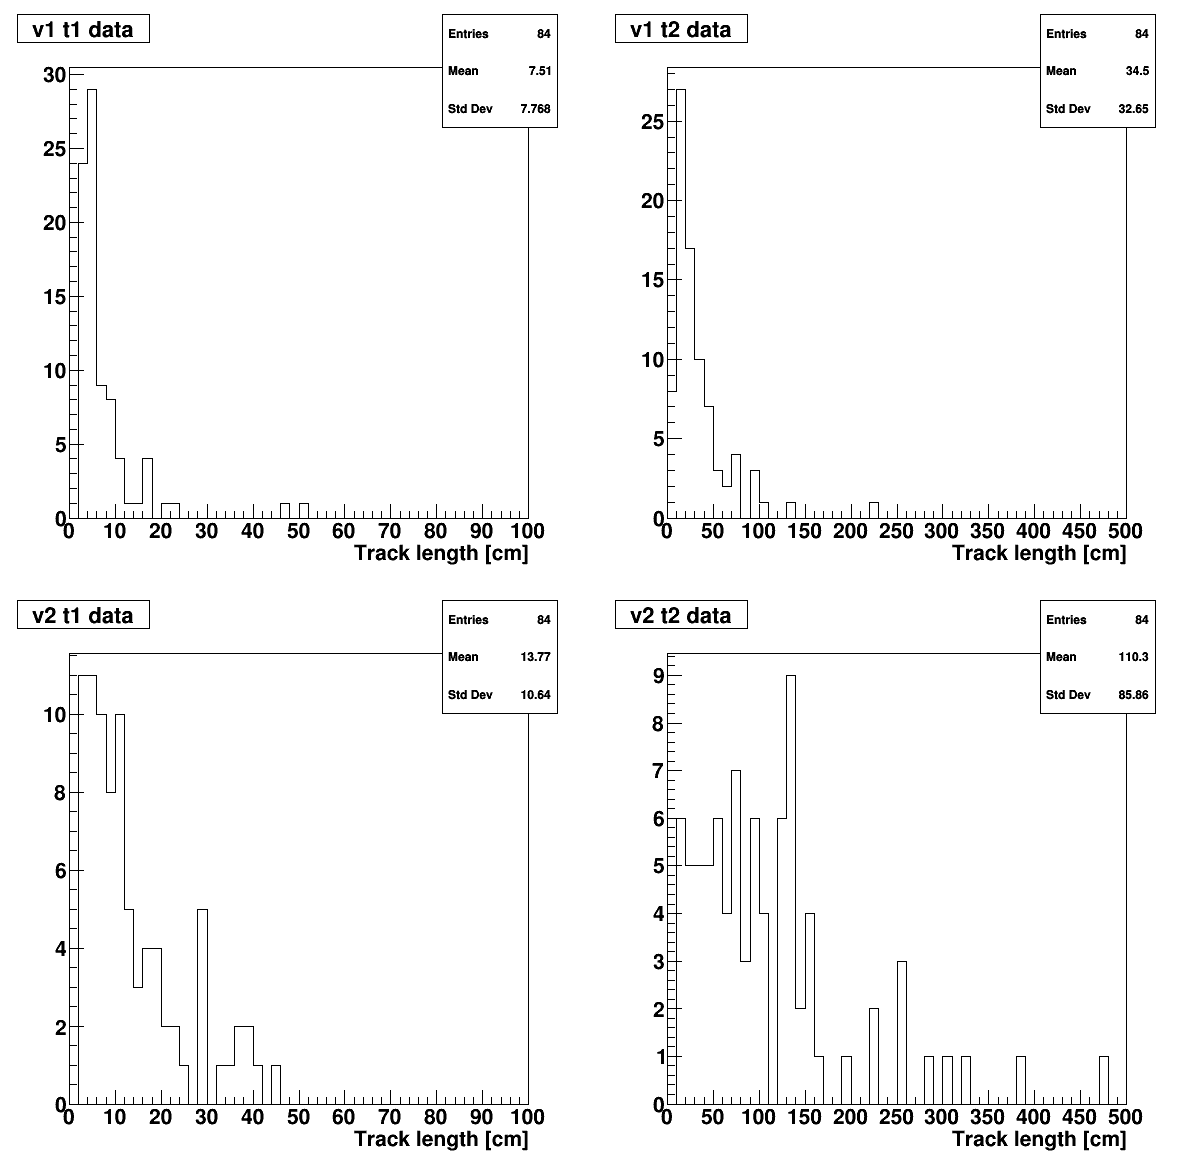

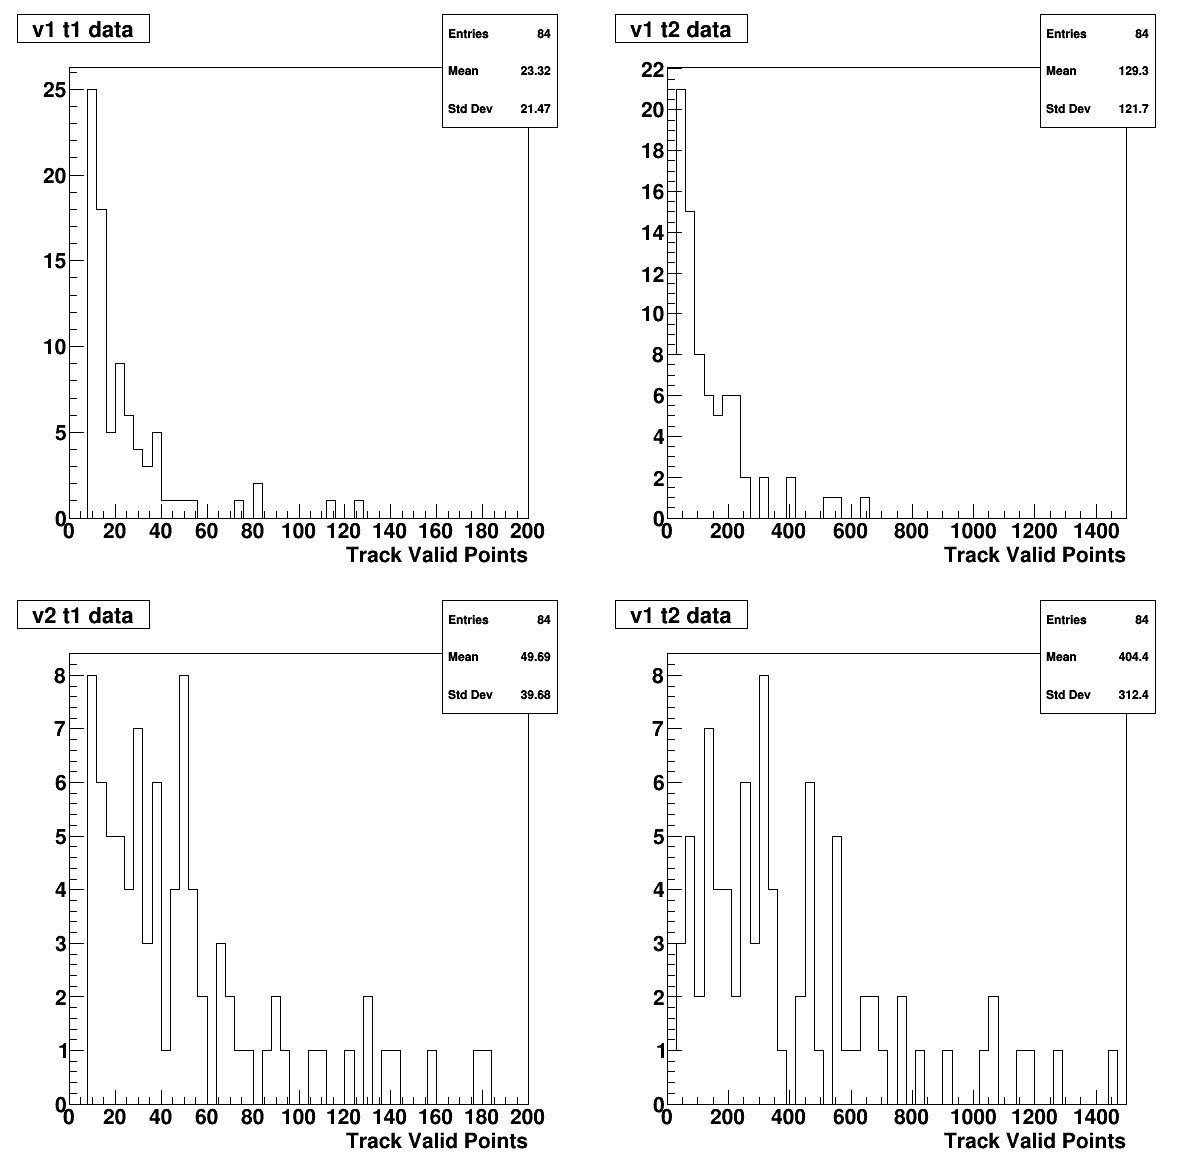

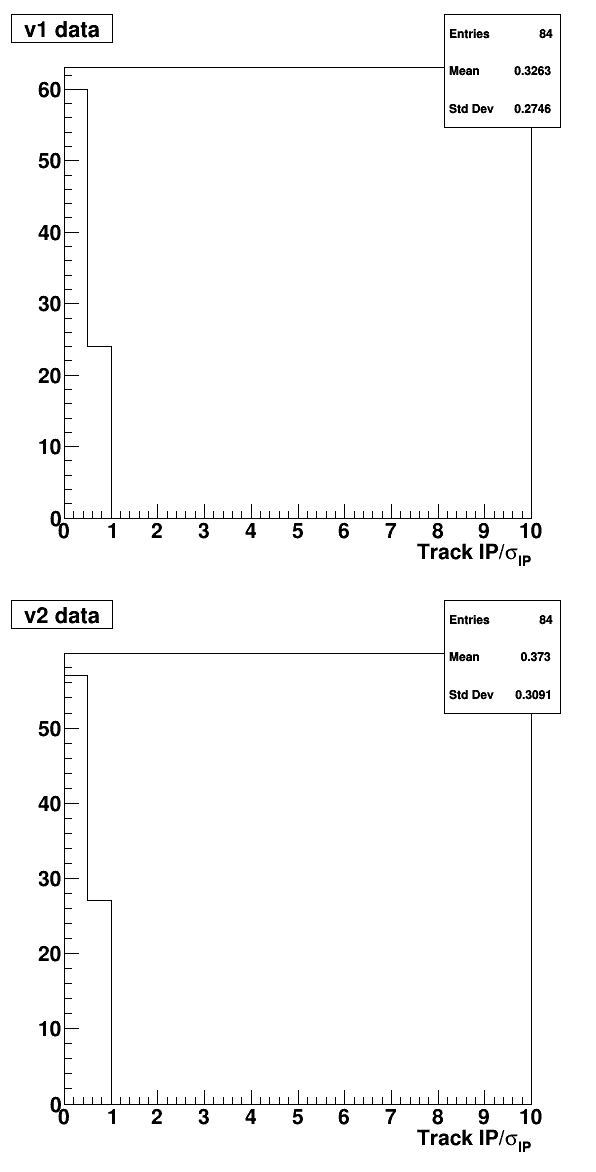

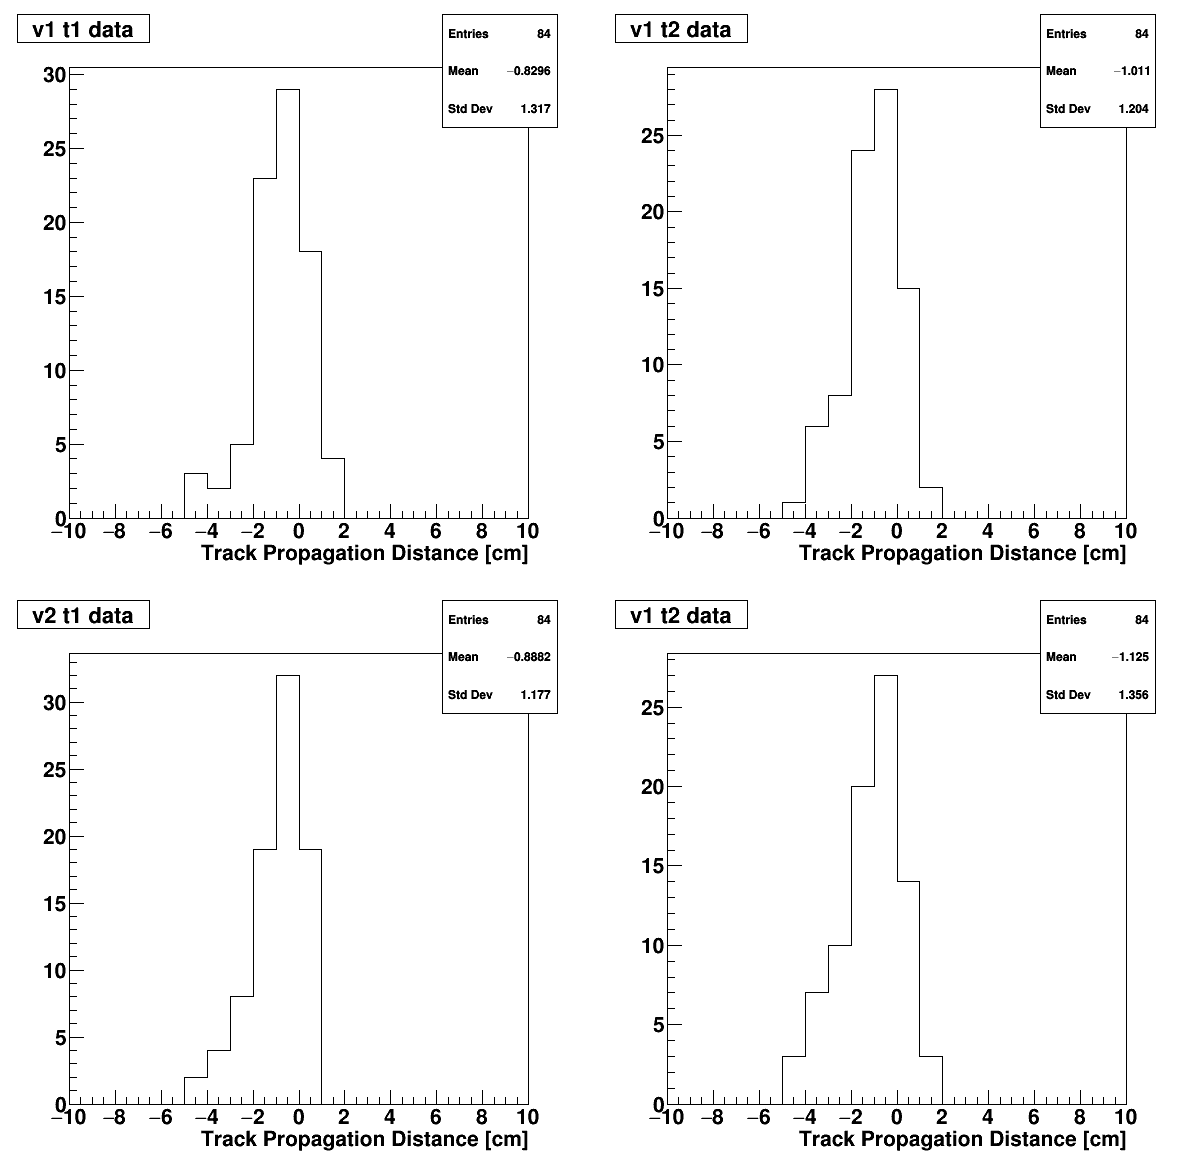

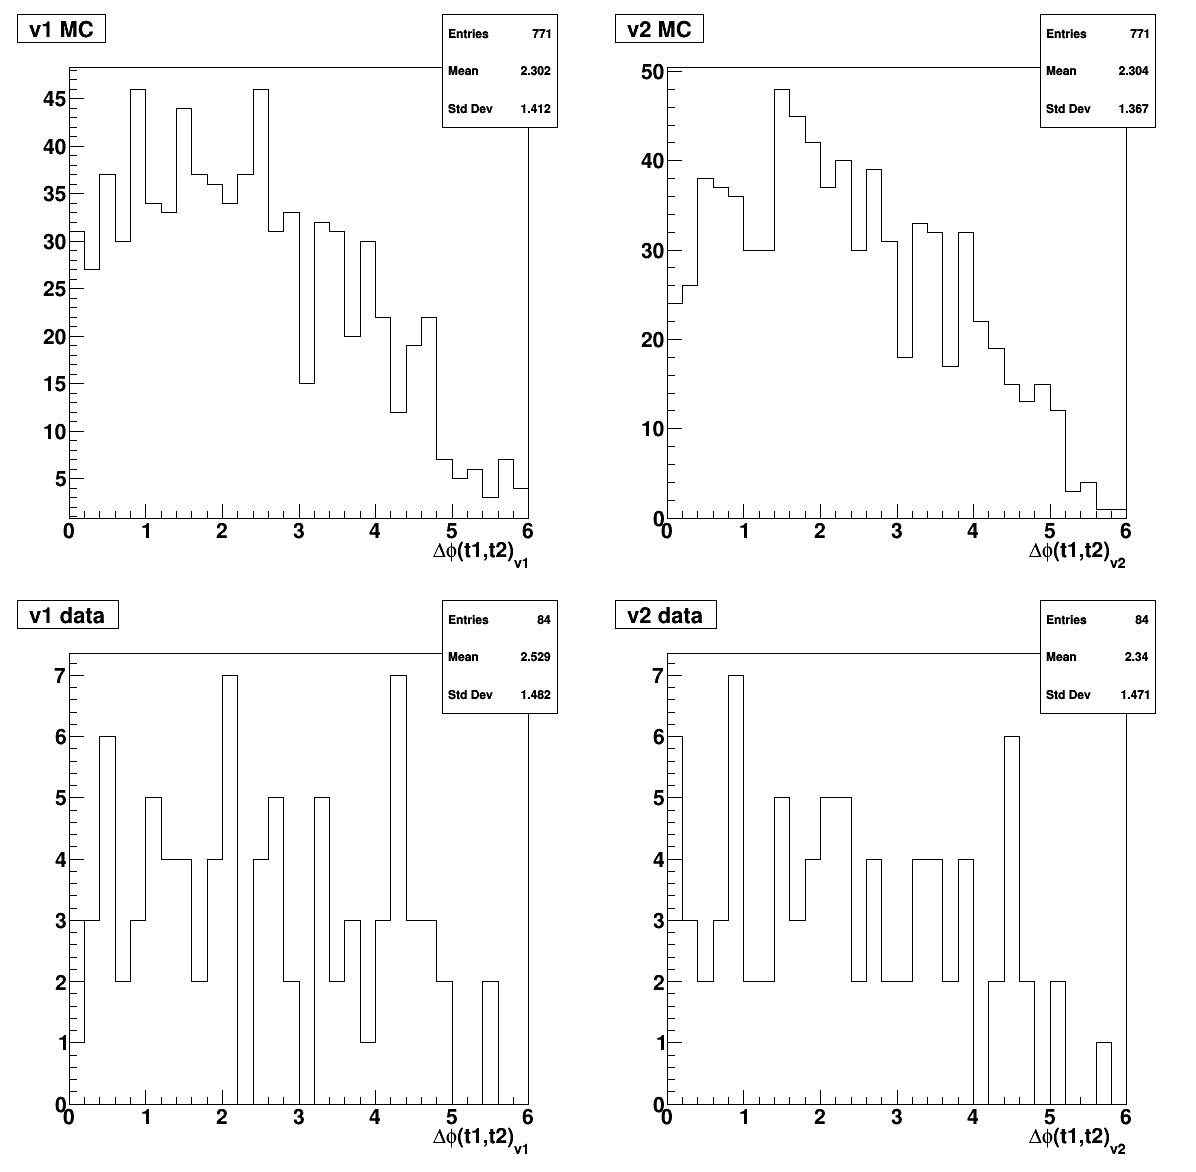

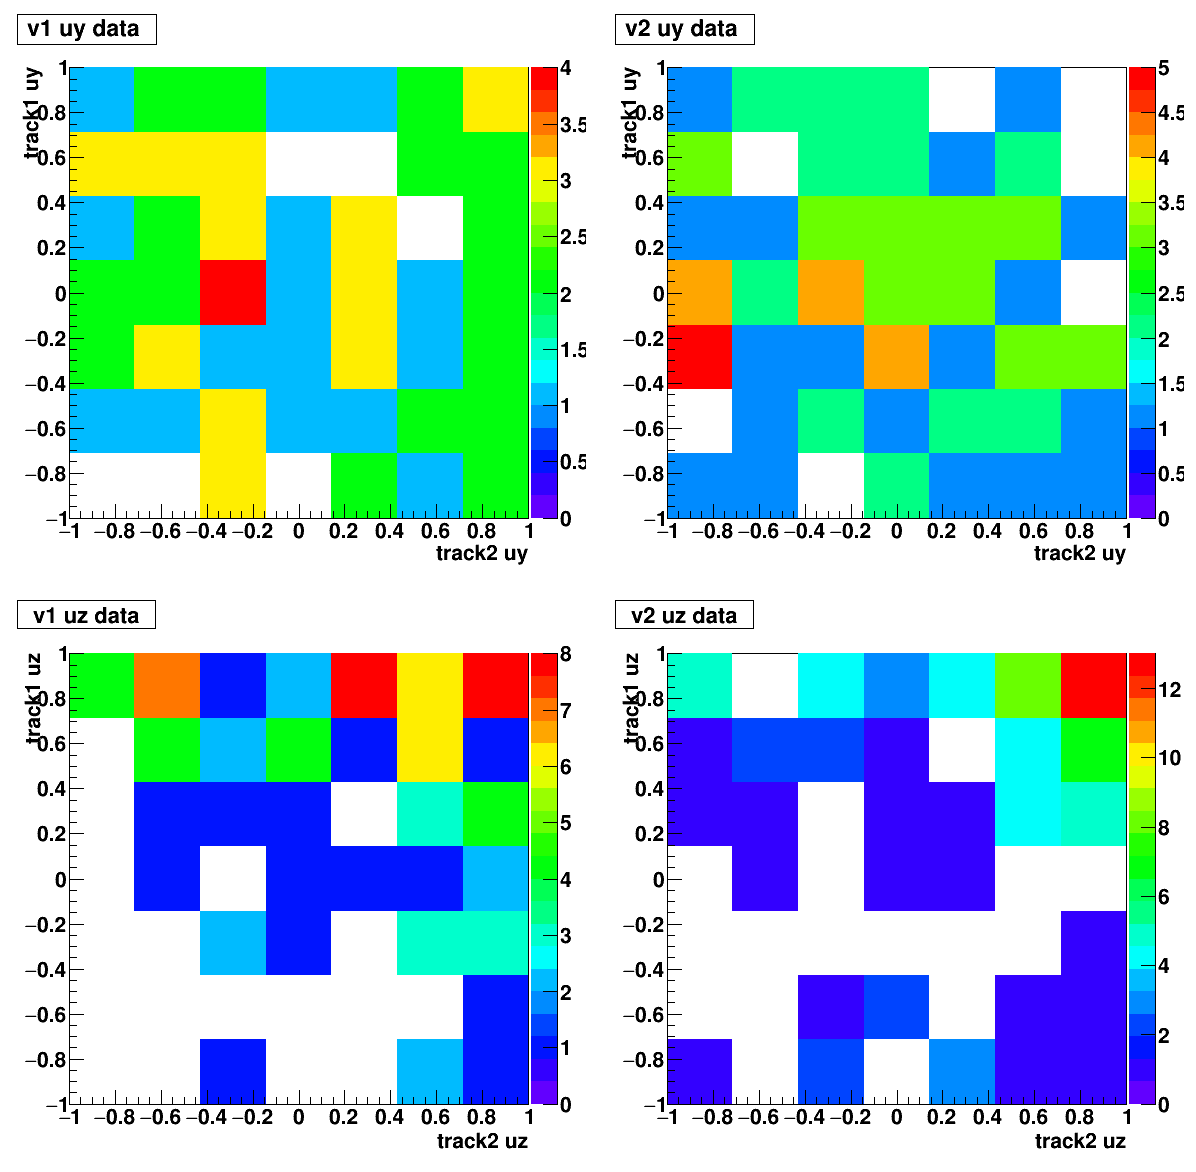

In [14]:
### Data distributions ###
# track length
cdlennhv1 = R.TCanvas("cdlennhv1","cdlennhv1",1200,1200)
cdlennhv1.Divide(2,2)
cdlennhv1.Draw()
cdlennhv1.cd(1)
v1tlen0 = R.TH1F("v1tlen0","v1 t1 data",50,0,100)
v1tlen0.GetXaxis().SetTitle("Track length [cm]")
td.Draw("min(tlength[v1tidx[0]],tlength[v1tidx[1]])>>v1tlen0",cut12)
cdlennhv1.cd(2)
v1tlen1 = R.TH1F("v1tlen1","v1 t2 data",50,0,500)
v1tlen1.GetXaxis().SetTitle("Track length [cm]")
td.Draw("max(tlength[v1tidx[0]],tlength[v1tidx[1]])>>v1tlen1",cut12)
cdlennhv1.cd(3)
v2tlen0 = R.TH1F("v2tlen0","v2 t1 data",50,0,100)
v2tlen0.GetXaxis().SetTitle("Track length [cm]")
td.Draw("min(tlength[v2tidx[0]],tlength[v2tidx[1]])>>v2tlen0",cut12)
cdlennhv1.cd(4)
v2tlen1 = R.TH1F("v2tlen1","v2 t2 data",50,0,500)
v2tlen1.GetXaxis().SetTitle("Track length [cm]")
td.Draw("max(tlength[v2tidx[0]],tlength[v2tidx[1]])>>v2tlen1",cut12)
#
# track valid hits
cdlennhv2 = R.TCanvas("cdlennhv2","cdlennhv2",1200,1200)
cdlennhv2.Divide(2,2)
cdlennhv2.Draw()
cdlennhv2.cd(1)
v1tnvh0 = R.TH1F("v1tnvh0","v1 t1 data",50,0,200)
v1tnvh0.GetXaxis().SetTitle("Track Valid Points")
td.Draw("min(tnvalid[v1tidx[0]],tnvalid[v1tidx[1]])>>v1tnvh0",cut12)
cdlennhv2.cd(2)
v1tnvh1 = R.TH1F("v1tnvh1","v1 t2 data",50,0,1500)
v1tnvh1.GetXaxis().SetTitle("Track Valid Points")
td.Draw("max(tnvalid[v1tidx[0]],tnvalid[v1tidx[1]])>>v1tnvh1",cut12)
cdlennhv2.cd(3)
v2tnvh0 = R.TH1F("v2tnvh0","v2 t1 data",50,0,200)
v2tnvh0.GetXaxis().SetTitle("Track Valid Points")
td.Draw("min(tnvalid[v2tidx[0]],tnvalid[v2tidx[1]])>>v2tnvh0",cut12)
cdlennhv2.cd(4)
v2tnvh1 = R.TH1F("v2tnvh1","v1 t2 data",50,0,1500)
v2tnvh1.GetXaxis().SetTitle("Track Valid Points")
td.Draw("max(tnvalid[v2tidx[0]],tnvalid[v2tidx[1]])>>v2tnvh1",cut12)
#
# sip
cdsippdv1 = R.TCanvas("cdsippdv1","cdsippdv1",600,1200)
cdsippdv1.Divide(1,2)
cdsippdv1.Draw()
cdsippdv1.cd(1)
v1tsip0 = R.TH1F("v1tsip0","v1 data",20,0,10)
v1tsip0.GetXaxis().SetTitle("Track IP/#sigma_{IP}")
td.Draw("v1tsip[0]>>v1tsip0",cut12)
cdsippdv1.cd(2)
v2tsip0 = R.TH1F("v2tsip0","v2 data",20,0,10)
v2tsip0.GetXaxis().SetTitle("Track IP/#sigma_{IP}")
td.Draw("v2tsip[0]>>v2tsip0",cut12)
#
# propagation distance
cdsippdv2 = R.TCanvas("cdsippdv2","cdsippdv2",1200,1200)
cdsippdv2.Divide(2,2)
cdsippdv2.Draw()
cdsippdv2.cd(1)
v1tpd0 = R.TH1F("v1tpd0","v1 t1 data",20,-10,10)
v1tpd0.GetXaxis().SetTitle("Track Propagation Distance [cm]")
td.Draw("v1tpd[0]>>v1tpd0",cut12)
cdsippdv2.cd(2)
v1tpd1 = R.TH1F("v1tpd1","v1 t2 data",20,-10,10)
v1tpd1.GetXaxis().SetTitle("Track Propagation Distance [cm]")
td.Draw("v1tpd[1]>>v1tpd1",cut12)
cdsippdv2.cd(3)
v2tpd0 = R.TH1F("v2tpd0","v2 t1 data",20,-10,10)
v2tpd0.GetXaxis().SetTitle("Track Propagation Distance [cm]")
td.Draw("v2tpd[0]>>v2tpd0",cut12)
cdsippdv2.cd(4)
v2tpd1 = R.TH1F("v2tpd1","v1 t2 data",20,-10,10)
v2tpd1.GetXaxis().SetTitle("Track Propagation Distance [cm]")
td.Draw("v2tpd[1]>>v2tpd1",cut12)
#
# Track DeltaPhi
cdpd = R.TCanvas("cdpd","cdpd",1200,1200)
cdpd.Divide(2,2)
cdpd.Draw()
cdpd.cd(1)
hdpmc1 = R.TH1F("hdpmc1","v1 MC",30,0,6)
hdpmc1.GetXaxis().SetTitle("#Delta#phi(t1,t2)_{v1}")
t.Draw("abs(atan2(tk_vtx_uy[v1tidx[0]],tk_vtx_ux[v1tidx[0]])-atan2(tk_vtx_uy[v1tidx[1]],tk_vtx_ux[v1tidx[1]]))>>hdpmc1",cut12)
cdpd.cd(2)
hdpmc2 = R.TH1F("hdpmc2","v2 MC",30,0,6)
hdpmc2.GetXaxis().SetTitle("#Delta#phi(t1,t2)_{v2}")
t.Draw("abs(atan2(tk_vtx_uy[v2tidx[0]],tk_vtx_ux[v2tidx[0]])-atan2(tk_vtx_uy[v2tidx[1]],tk_vtx_ux[v2tidx[1]]))>>hdpmc2",cut12)
cdpd.cd(3)
hdpda1 = R.TH1F("hdpda1","v1 data",30,0,6)
hdpda1.GetXaxis().SetTitle("#Delta#phi(t1,t2)_{v1}")
td.Draw("abs(atan2(tk_vtx_uy[v1tidx[0]],tk_vtx_ux[v1tidx[0]])-atan2(tk_vtx_uy[v1tidx[1]],tk_vtx_ux[v1tidx[1]]))>>hdpda1",cut12)
cdpd.cd(4)
hdpda2 = R.TH1F("hdpda2","v2 data",30,0,6)
hdpda2.GetXaxis().SetTitle("#Delta#phi(t1,t2)_{v2}")
td.Draw("abs(atan2(tk_vtx_uy[v2tidx[0]],tk_vtx_ux[v2tidx[0]])-atan2(tk_vtx_uy[v2tidx[1]],tk_vtx_ux[v2tidx[1]]))>>hdpda2",cut12)

# Track Directions2D Data
ctdd = R.TCanvas("ctdd","ctdd",1200,1200)
ctdd.Divide(2,2)
ctdd.Draw()
ctdd.cd(1)
hv1uy1uy2d = R.TH2F("hv1uy1uy2d","v1 uy data",7,-1,1,7,-1,1)
hv1uy1uy2d.SetStats(0)
td.Draw("tk_vtx_uy[v1tidx[0]]:tk_vtx_uy[v1tidx[1]]>>hv1uy1uy2d",cut12,"goff")
hv1uy1uy2d.GetXaxis().SetTitle("track2 uy")
hv1uy1uy2d.GetYaxis().SetTitle("track1 uy")
hv1uy1uy2d.Draw("colz")
ctdd.cd(2)
hv2uy1uy2d = R.TH2F("hv2uy1uy2d","v2 uy data",7,-1,1,7,-1,1)
hv2uy1uy2d.SetStats(0)
td.Draw("tk_vtx_uy[v2tidx[0]]:tk_vtx_uy[v2tidx[1]]>>hv2uy1uy2d",cut12,"goff")
hv2uy1uy2d.GetXaxis().SetTitle("track2 uy")
hv2uy1uy2d.GetYaxis().SetTitle("track1 uy")
hv2uy1uy2d.Draw("colz")
ctdd.cd(3)
hv1uz1uz2d = R.TH2F("hv1uz1uz2d","v1 uz data",7,-1,1,7,-1,1)
hv1uz1uz2d.SetStats(0)
td.Draw("tk_vtx_uz[v1tidx[0]]:tk_vtx_uz[v1tidx[1]]>>hv1uz1uz2d",cut12,"goff")
hv1uz1uz2d.GetXaxis().SetTitle("track2 uz")
hv1uz1uz2d.GetYaxis().SetTitle("track1 uz")
hv1uz1uz2d.Draw("colz")
ctdd.cd(4)
hv2uz1uz2d = R.TH2F("hv2uz1uz2d","v2 uz data",7,-1,1,7,-1,1)
hv2uz1uz2d.SetStats(0)
td.Draw("tk_vtx_uz[v2tidx[0]]:tk_vtx_uz[v2tidx[1]]>>hv2uz1uz2d",cut12,"goff")
hv2uz1uz2d.GetXaxis().SetTitle("track2 uz")
hv2uz1uz2d.GetYaxis().SetTitle("track1 uz")
hv2uz1uz2d.Draw("colz")

168L

***********************************************************************************
*    Row   * Instance *       run *    subrun *   eventid *    v1tkey *    v2tkey *
***********************************************************************************
*        2 *        0 *      5394 *        47 *      2386 *        15 *        14 *
*        2 *        1 *      5394 *        47 *      2386 *        17 *        16 *
*        4 *        0 *      5233 *       103 *      5167 *        16 *        11 *
*        4 *        1 *      5233 *       103 *      5167 *        18 *        17 *
*        6 *        0 *      5653 *        17 *       889 *        10 *         6 *
*        6 *        1 *      5653 *        17 *       889 *        13 *        11 *
*        8 *        0 *      5382 *       132 *      6622 *        15 *        11 *
*        8 *        1 *      5382 *       132 *      6622 *        23 *        21 *
*       15 *        0 *      5718 *        31 *      1593 *        20 *     

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cx12xd
Info in <TCanvas::Print>: png file xres-data.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: cy12xd
Info in <TCanvas::Print>: png file yres-data.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: cz12xd
Info in <TCanvas::Print>: png file zres-data.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c12xd2
Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> 

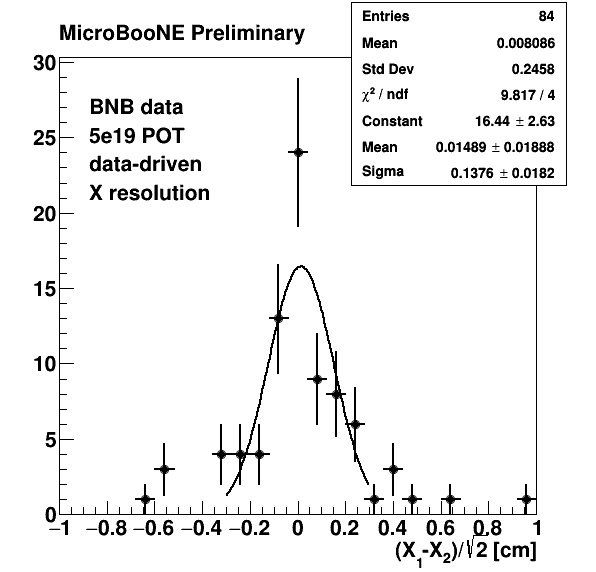

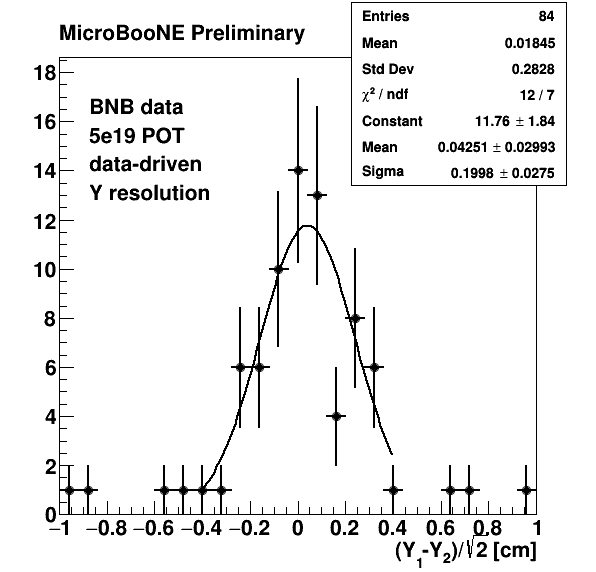

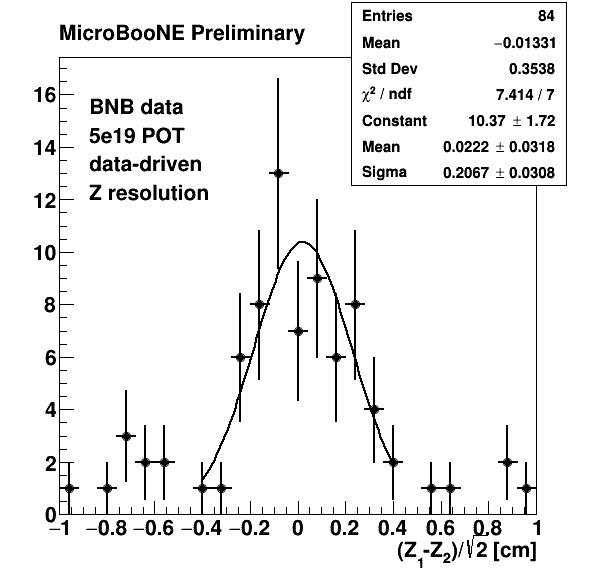

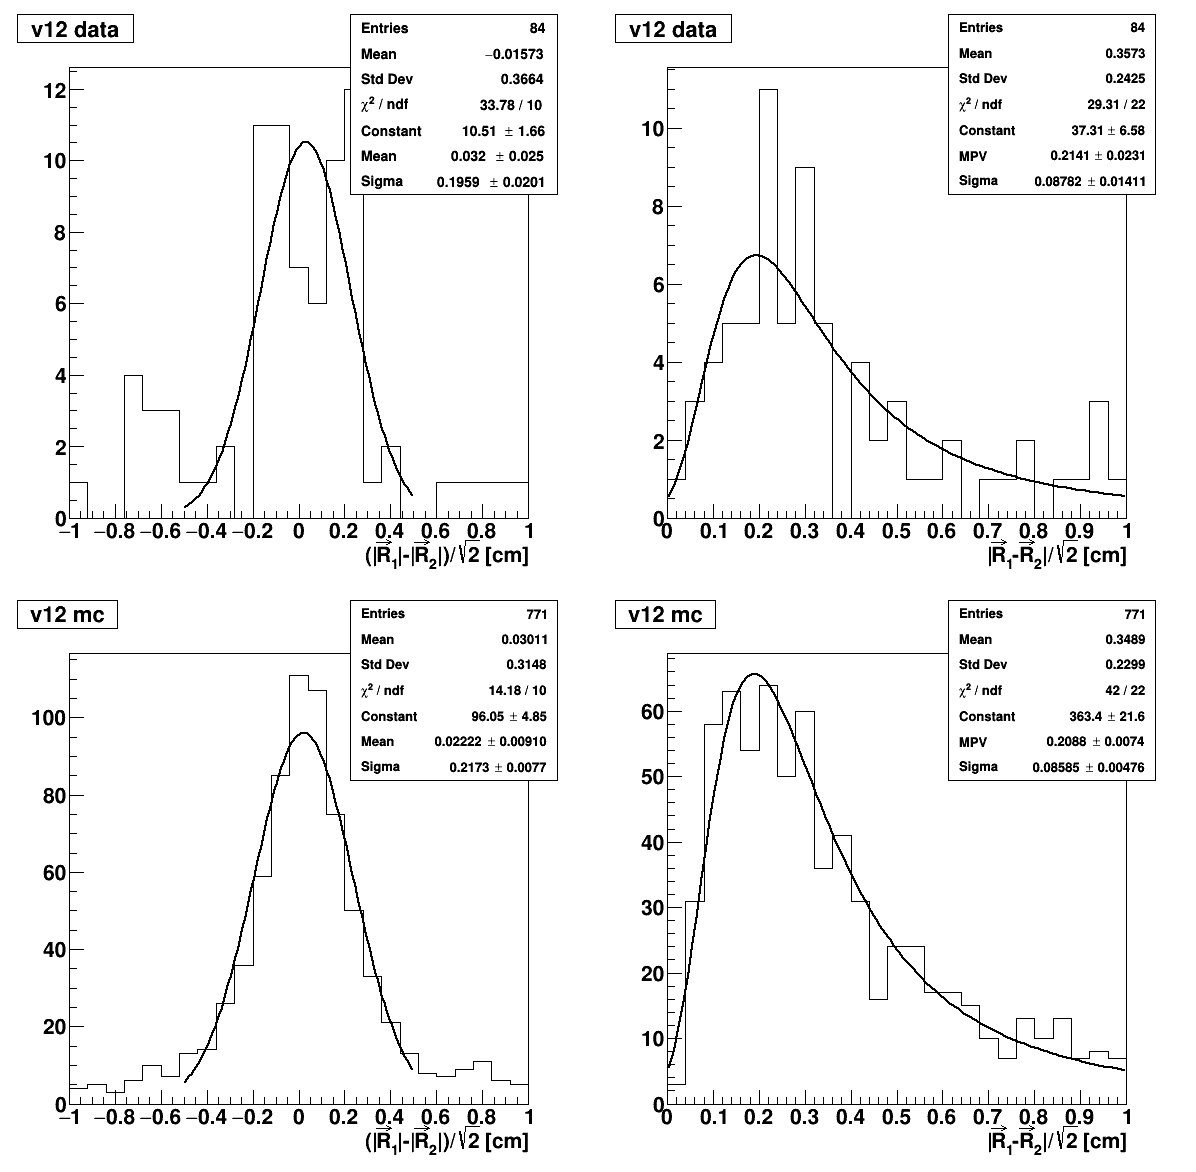

In [15]:
### Plots data and MC ###
#
# X,Y,Z v12 resolution: data and MC
#c12xd = R.TCanvas("c12xd","c12xd",1800,1200)
#c12xd.Divide(3,2)
#c12xd.Draw()
#c12xd.cd(1)
cx12xd = R.TCanvas("cx12xd","cx12xd",600,600)
cx12xd.Draw()
hx122d = R.TH1F("hx122d","",25,-1,1)#talk: 25, update:20
hx122d.GetXaxis().SetTitle("(X_{1}-X_{2})/#sqrt{2} [cm]")
hx122d.SetLineWidth(2)
hx122d.SetMarkerStyle(20)
td.Draw("(v1pos[0]-v2pos[0])*0.7071>>hx122d",cut12,"E")
hx122d.Fit("gaus","MLEQ","",-0.3,0.3)#talk: 0.2, update:0.35, MLEQ
label.DrawText(0.1, 0.93, "MicroBooNE Preliminary")
label.DrawText(0.15, 0.8,  "BNB data")
label.DrawText(0.15, 0.75, "5e19 POT")
label.DrawText(0.15, 0.7, "data-driven")
label.DrawText(0.15, 0.65, "X resolution")
cx12xd.SaveAs("xres-data.png")
#c12xd.cd(2)
cy12xd = R.TCanvas("cy12xd","cy12xd",600,600)
cy12xd.Draw()
hy122d = R.TH1F("hy122d","",25,-1,1)#25, update:20
hy122d.GetXaxis().SetTitle("(Y_{1}-Y_{2})/#sqrt{2} [cm]")
hy122d.SetLineWidth(2)
hy122d.SetMarkerStyle(20)
td.Draw("(v1pos[1]-v2pos[1])*0.7071>>hy122d",cut12,"E")
hy122d.Fit("gaus","MLEQ","",-0.4,0.4)#talk: 0.3, update:0.35, MLEQ
label.DrawText(0.1, 0.93, "MicroBooNE Preliminary")
label.DrawText(0.15, 0.8,  "BNB data")
label.DrawText(0.15, 0.75, "5e19 POT")
label.DrawText(0.15, 0.7, "data-driven")
label.DrawText(0.15, 0.65, "Y resolution")
cy12xd.SaveAs("yres-data.png")
#c12xd.cd(3)
cz12xd = R.TCanvas("cz12xd","cz12xd",600,600)
cz12xd.Draw()
hz122d = R.TH1F("hz122d","",25,-1,1)#25, update:20
hz122d.GetXaxis().SetTitle("(Z_{1}-Z_{2})/#sqrt{2} [cm]")
hz122d.SetLineWidth(2)
hz122d.SetMarkerStyle(20)
td.Draw("(v1pos[2]-v2pos[2])*0.7071>>hz122d",cut12,"E")
hz122d.Fit("gaus","MLEQ","",-0.4,0.4)#talk: 0.3, update:0.35, MLEQ
label.DrawText(0.1, 0.93, "MicroBooNE Preliminary")
label.DrawText(0.15, 0.8,  "BNB data")
label.DrawText(0.15, 0.75, "5e19 POT")
label.DrawText(0.15, 0.7, "data-driven")
label.DrawText(0.15, 0.65, "Z resolution")
cz12xd.SaveAs("zres-data.png")
#c12xd.cd(4)
#hx122.Draw()
#c12xd.cd(5)
#hy122.Draw()
#c12xd.cd(6)
#hz122.Draw()
#
# R resolution and 3D distance v12: data and MC
c12xd2 = R.TCanvas("c12xd2","c12xd2",1200,1200)
c12xd2.Divide(2,2)
c12xd2.Draw()
c12xd2.cd(1)
hr32d = R.TH1F("v12data2","v12 data",25,-1,1)
hr32d.GetXaxis().SetTitle("(|#vec{R}_{1}|-|#vec{R}_{2}|)/#sqrt{2} [cm]")
td.Draw("(sqrt(v1pos[0]*v1pos[0]+v1pos[1]*v1pos[1]+v1pos[2]*v1pos[2])-sqrt(v2pos[0]*v2pos[0]+v2pos[1]*v2pos[1]+v2pos[2]*v2pos[2]))*0.7071>>v12data2",cut12)
hr32d.Fit("gaus","MLEQ","",-0.5,0.5)
c12xd2.cd(2)
hr3d = R.TH1F("v12data","v12 data",25,0,1)
hr3d.GetXaxis().SetTitle("|#vec{R}_{1}-#vec{R}_{2}|/#sqrt{2} [cm]")
td.Draw("sqrt( (v1pos[0]-v2pos[0])*(v1pos[0]-v2pos[0]) + (v1pos[1]-v2pos[1])*(v1pos[1]-v2pos[1]) + (v1pos[2]-v2pos[2])*(v1pos[2]-v2pos[2]) )*0.7071>>v12data",cut12)
hr3d.Fit("landau","MLEQ","",0.,1.)
c12xd2.cd(3)
hr32.Draw()
c12xd2.cd(4)
hr3.Draw()
#
#
td.Scan("run:subrun:eventid:v1tkey:v2tkey",cut12)